![CARCASSONNE](Logo.png)

# PROJET STID 2020-2021
### LES ÉTABLISSEMENTS LES PLUS CONVOITÉS SELON RÉGION ET FILIÈRE DE FORMATION 2018-2019

@author: **Jéros VIGAN**


## =============================================================================
##  IMPORTATION DES MODULES 
## =============================================================================

In [2]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from collections import Counter
import time
import researchpy as rp

from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
import scipy
import statsmodels
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [137]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

### ===============================================================
###  Declaration du dossier de travail
### ===============================================================

In [5]:
import os
base= r'C:\Users\Jéros\01_TraitementFichier\projetSTID'
base=base.replace('\\','/')
os.chdir(base)
os.getcwd()

'C:\\Users\\Jéros\\01_TraitementFichier\\projetSTID'

In [6]:
for file in os.listdir():
    print('ce dossier contient :', file)

ce dossier contient : ACM.pdf
ce dossier contient : cah_kmeans_avec_python.pdf
ce dossier contient : functions.py
ce dossier contient : function_biplot.py
ce dossier contient : parcousup-2018.csv
ce dossier contient : parcousup-2019.csv
ce dossier contient : __pycache__


### ===============================================================
### importation des  données 
### ===============================================================

In [7]:
Dataset2018=pd.read_csv("parcousup-2018.csv",sep=";",encoding='ISO-8859-1')
Dataset2019=pd.read_csv("parcousup-2019.csv",sep=";",encoding='ISO-8859-1')

In [8]:
cols = ['Session',"Code UAI de l'établissement",'Établissement',
    'Région de l\x92établissement',
        'Filière de formation',
        'Capacité de l\x92établissement par formation',
        'Effectif total des candidats pour une formation',
     'Dont effectif des candidates pour une formation',
     'Effectif total des candidats en phase principale']
cols

['Session',
 "Code UAI de l'établissement",
 'Établissement',
 'Région de l\x92établissement',
 'Filière de formation',
 'Capacité de l\x92établissement par formation',
 'Effectif total des candidats pour une formation',
 'Dont effectif des candidates pour une formation',
 'Effectif total des candidats en phase principale']

In [9]:
Dataset2018[cols].sample(5)

Session Code UAI de l'établissement                  Établissement  \
6988     2018                    0751883P  Institut Supérieur Clorivière   
3108     2018                    0330028B           Lycée Gustave Eiffel   
7126     2018                    0911346U          Lycée Albert Einstein   
8188     2018                    0060677D                 Lycée Sasserno   
6777     2018                    0490075R                    ESEO Angers   

       Région de létablissement     Filière de formation  \
6988               Ile-de-France           BTS - Services   
3108          Nouvelle-Aquitaine           BTS - Services   
7126               Ile-de-France           BTS - Services   
8188  Provence Alpes Côte d'Azur           BTS - Services   
6777            Pays de la Loire  Formations d'ingénieurs   

      Capacité de létablissement par formation  \
6988                                         72   
3108                                         64   
7126                                         35   
8188                                         35   
6777                                        144   

      Effectif total des candidats pour une formation  \
6988                                              992   
3108                                              890   
7126                                              836   
8188                                              158   
6777                                             7713   

      Dont effectif des candidates pour une formation  \
6988                                              711   
3108                                               58   
7126                                              443   
8188                                              133   
6777                                             2036   

      Effectif total des candidats en phase principale  
6988                                               755  
3108                                               890  
7126                                               836  
8188                                               120  
6777                                              7713

In [10]:
Dataset2019[cols].sample(5)

Session Code UAI de l'établissement  \
1522      2019                    9740054R   
11336     2019                    0672834S   
1666      2019                    0911975C   
8267      2019                    0641842E   
7497      2019                    0132123M   

                                           Établissement  \
1522                               Lycée Lislet-Geoffroy   
11336                                 I.U.T. de Haguenau   
1666                     Université d'Evry Val d'Essonne   
8267                           I.U.T des Pays de l'Adour   
7497   Aix Marseille Université - site d'Aix-en-Provence   

        Région de létablissement              Filière de formation  \
1522                   La Réunion                  BTS - Production   
11336                   Grand Est                  DUT - Production   
1666                Ile-de-France  Licence - Droit-économie-gestion   
8267           Nouvelle-Aquitaine                     DUT - Service   
7497   Provence Alpes Côte d'Azur    Licence - Arts-lettres-langues   

       Capacité de létablissement par formation  \
1522                                        30.0   
11336                                       12.0   
1666                                        45.0   
8267                                        56.0   
7497                                        42.0   

       Effectif total des candidats pour une formation  \
1522                                               397   
11336                                              100   
1666                                              1657   
8267                                               419   
7497                                               272   

       Dont effectif des candidates pour une formation  \
1522                                                 8   
11336                                               12   
1666                                               969   
8267                                               121   
7497                                               198   

       Effectif total des candidats en phase principale  
1522                                                351  
11336                                                79  
1666                                                637  
8267                                                418  
7497                                                229

In [11]:
frames = [Dataset2018[cols],Dataset2019[cols]]

In [12]:
result = pd.concat(frames)

In [13]:
result.head(5)

Session Code UAI de l'établissement  \
0     2018                    0261372A   
1     2018                    0421095M   
2     2018                    0421095M   
3     2018                    0421095M   
4     2018                    0421095M   

                                     Établissement Région de létablissement  \
0  Université Grenoble Alpes - Antennes de Valence      Auvergne-Rhône-Alpes   
1            Universite Jean Monnet, Saint-Etienne      Auvergne-Rhône-Alpes   
2            Universite Jean Monnet, Saint-Etienne      Auvergne-Rhône-Alpes   
3            Universite Jean Monnet, Saint-Etienne      Auvergne-Rhône-Alpes   
4            Universite Jean Monnet, Saint-Etienne      Auvergne-Rhône-Alpes   

               Filière de formation  \
0  Licence - Droit-économie-gestion   
1    Licence - Arts-lettres-langues   
2    Licence - Arts-lettres-langues   
3    Licence - Arts-lettres-langues   
4    Licence - Arts-lettres-langues   

   Capacité de létablissement par formation  \
0                                       35.0   
1                                      175.0   
2                                       30.0   
3                                       55.0   
4                                       45.0   

   Effectif total des candidats pour une formation  \
0                                              251   
1                                             1096   
2                                              143   
3                                              223   
4                                              145   

   Dont effectif des candidates pour une formation  \
0                                              153   
1                                              850   
2                                               99   
3                                              176   
4                                              110   

   Effectif total des candidats en phase principale  
0                                               172  
1                                              1095  
2                                               103  
3                                               184  
4                                                84

In [147]:
result.tail(5)

Session Code UAI de l'établissement  \
11572     2019                    0600020W   
11573     2019                    0710026T   
11574     2019                    0251079M   
11575     2019                    0160020K   
11576     2019                    0790964U   

                              Établissement Région de létablissement  \
11572                     Lycée Marie Curie           Hauts-de-France   
11573                       Lycée LEON BLUM   Bourgogne-Franche-Comté   
11574   Lycée professionnel Tristan Bernard   Bourgogne-Franche-Comté   
11575                     Lycée Jean Monnet        Nouvelle-Aquitaine   
11576  Lycée professionnel Thomas-Jean Main        Nouvelle-Aquitaine   

         Filière de formation  Capacité de létablissement par formation  \
11572  Mention complémentaire                                       20.0   
11573  Mention complémentaire                                       25.0   
11574  Mention complémentaire                                       20.0   
11575  Mention complémentaire                                       24.0   
11576  Mention complémentaire                                       24.0   

       Effectif total des candidats pour une formation  \
11572                                                0   
11573                                                0   
11574                                                0   
11575                                                0   
11576                                                0   

       Dont effectif des candidates pour une formation  \
11572                                                0   
11573                                                0   
11574                                                0   
11575                                                0   
11576                                                0   

       Effectif total des candidats en phase principale  
11572                                                 0  
11573                                                 0  
11574                                                 0  
11575                                                 0  
11576                                                 0

In [148]:
result.sample(5)

Session Code UAI de l'établissement                     Établissement  \
9222     2018                    0210047M  Lycée Anna Judic Semur en Auxois   
244      2018                    T942095S                  EPITA Strasbourg   
9149     2018                    0400750Y             Lycée agricole DE DAX   
957      2018                    0120022J              Lycée Ferdinand Foch   
380      2019                    0312408Z                     Lycée Saliège   

     Région de létablissement                           Filière de formation  \
9222   Bourgogne-Franche-Comté                                 BTS - Services   
244                  Grand Est                        Formations d'ingénieurs   
9149        Nouvelle-Aquitaine                                           BTSA   
957                  Occitanie               Classe préparatoire scientifique   
380                  Occitanie  Classe préparatoire économique et commerciale   

      Capacité de létablissement par formation  \
9222                                       36.0   
244                                        45.0   
9149                                       30.0   
957                                        24.0   
380                                        48.0   

      Effectif total des candidats pour une formation  \
9222                                              180   
244                                              5699   
9149                                              214   
957                                               630   
380                                               409   

      Dont effectif des candidates pour une formation  \
9222                                              122   
244                                              1314   
9149                                               52   
957                                               196   
380                                               181   

      Effectif total des candidats en phase principale  
9222                                               119  
244                                               5699  
9149                                               213  
957                                                630  
380                                                391

In [15]:
def dataset_info(dataset):
    print(' ● taille:', dataset.shape)
    print('-------------------------')
    time.sleep(1)
    print(' ● types de données:\n', dataset.dtypes.value_counts())
    print('-------------------------')
    time.sleep(2)
    print(' ● valeurs manquantes:', sum(pd.DataFrame(dataset).isnull().sum(axis=1).tolist()))
    print('-------------------------')
    time.sleep(2)
    print(' ● nombre de valeurs:', dataset.shape[0]*dataset.shape[1])

In [16]:
df=result.copy()
df['Session']=pd.Categorical(df['Session'])
dataset_info(df)

 ● taille: (22274, 9)
-------------------------
 ● types de données:
 object      4
int64       3
category    1
float64     1
dtype: int64
-------------------------
 ● valeurs manquantes: 19
-------------------------
 ● nombre de valeurs: 200466


<AxesSubplot:ylabel='None'>

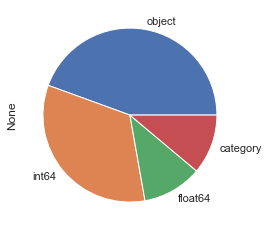

In [151]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

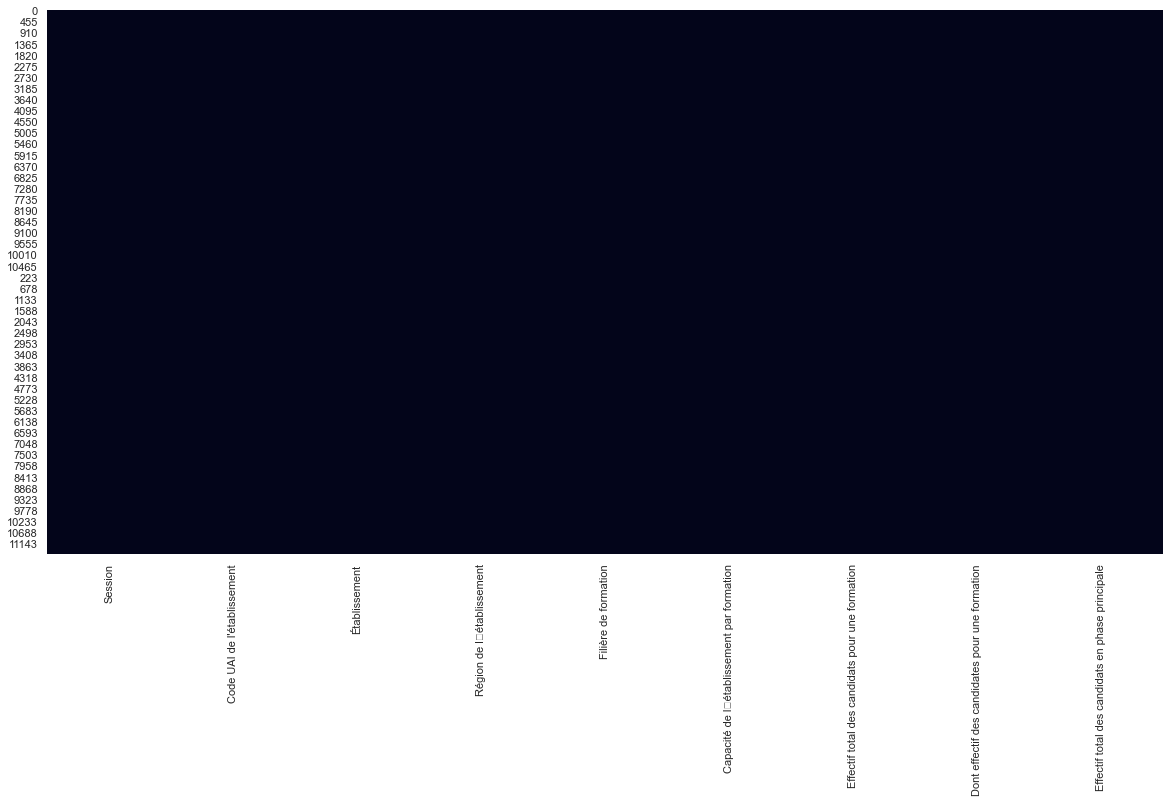

In [152]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Suppression des variables ayant des valeurs manquantes

In [153]:
def val_manquant(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return  missing_data

In [154]:
val_manquant(df)

Total   Percent
Capacité de létablissement par formation            19  0.000853
Effectif total des candidats en phase principale      0  0.000000
Dont effectif des candidates pour une formation       0  0.000000
Effectif total des candidats pour une formation       0  0.000000
Filière de formation                                  0  0.000000
Région de létablissement                             0  0.000000
Établissement                                         0  0.000000
Code UAI de l'établissement                           0  0.000000
Session                                               0  0.000000

In [17]:
df=df.set_index('Établissement')
dataset_info(df)

 ● taille: (22274, 8)
-------------------------
 ● types de données:
 int64       3
object      3
category    1
float64     1
dtype: int64
-------------------------
 ● valeurs manquantes: 19
-------------------------
 ● nombre de valeurs: 178192


## Quanti 2018-2019

In [156]:
df.select_dtypes(['int64','float64']).columns

Index(['Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'],
      dtype='object')

In [157]:
df.select_dtypes(['int64','float64']).head(5)

Capacité de létablissement par formation  \
Établissement                                                                                
Université Grenoble Alpes - Antennes de Valence                                       35.0   
Universite Jean Monnet, Saint-Etienne                                                175.0   
Universite Jean Monnet, Saint-Etienne                                                 30.0   
Universite Jean Monnet, Saint-Etienne                                                 55.0   
Universite Jean Monnet, Saint-Etienne                                                 45.0   

                                                 Effectif total des candidats pour une formation  \
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                              251   
Universite Jean Monnet, Saint-Etienne                                                       1096   
Universite Jean Monnet, Saint-Etienne                                                        143   
Universite Jean Monnet, Saint-Etienne                                                        223   
Universite Jean Monnet, Saint-Etienne                                                        145   

                                                 Dont effectif des candidates pour une formation  \
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                              153   
Universite Jean Monnet, Saint-Etienne                                                        850   
Universite Jean Monnet, Saint-Etienne                                                         99   
Universite Jean Monnet, Saint-Etienne                                                        176   
Universite Jean Monnet, Saint-Etienne                                                        110   

                                                 Effectif total des candidats en phase principale  
Établissement                                                                                      
Université Grenoble Alpes - Antennes de Valence                                               172  
Universite Jean Monnet, Saint-Etienne                                                        1095  
Universite Jean Monnet, Saint-Etienne                                                         103  
Universite Jean Monnet, Saint-Etienne                                                         184  
Universite Jean Monnet, Saint-Etienne                                                          84

In [18]:
df_resu=df.groupby('Établissement').sum()
df_resu.sample(5)

Capacité de létablissement par formation  \
Établissement                                                                                  
Lycée des métiers Saint Vincent de Paul                                                161.0   
Lycée agricole Charles Baltet                                                           51.0   
I.U.T de Sénart/Fontainebleau - Site Sénart - P12                                     1130.0   
Lycée Sainte Thecle                                                                     56.0   
ECAM EPMI                                                                              290.0   

                                                   Effectif total des candidats pour une formation  \
Établissement                                                                                        
Lycée des métiers Saint Vincent de Paul                                                        858   
Lycée agricole Charles Baltet                                                                  289   
I.U.T de Sénart/Fontainebleau - Site Sénart - P12                                            19141   
Lycée Sainte Thecle                                                                            300   
ECAM EPMI                                                                                     4121   

                                                   Dont effectif des candidates pour une formation  \
Établissement                                                                                        
Lycée des métiers Saint Vincent de Paul                                                        540   
Lycée agricole Charles Baltet                                                                   72   
I.U.T de Sénart/Fontainebleau - Site Sénart - P12                                             7372   
Lycée Sainte Thecle                                                                            273   
ECAM EPMI                                                                                      843   

                                                   Effectif total des candidats en phase principale  
Établissement                                                                                        
Lycée des métiers Saint Vincent de Paul                                                         653  
Lycée agricole Charles Baltet                                                                   289  
I.U.T de Sénart/Fontainebleau - Site Sénart - P12                                             18433  
Lycée Sainte Thecle                                                                             233  
ECAM EPMI                                                                                      4041

In [159]:
print("la taille du tableau quanti",df.select_dtypes(['int64','float64']).shape)
print("-------------------------------")
print("la taille du taille reduit par Etablissement",df_resu.shape)

la taille du tableau quanti (22274, 4)
-------------------------------
la taille du taille reduit par Etablissement (3356, 4)


In [160]:
df.select_dtypes(['int64','float64']).describe()

Capacité de létablissement par formation  \
count                               22255.000000   
mean                                   63.148776   
std                                   120.374969   
min                                     1.000000   
25%                                    23.000000   
50%                                    34.000000   
75%                                    55.000000   
max                                  3100.000000   

       Effectif total des candidats pour une formation  \
count                                     22274.000000   
mean                                        756.176529   
std                                        1513.320325   
min                                           0.000000   
25%                                         158.000000   
50%                                         333.000000   
75%                                         765.750000   
max                                       21829.000000   

       Dont effectif des candidates pour une formation  \
count                                     22274.000000   
mean                                        390.256128   
std                                         804.973804   
min                                           0.000000   
25%                                          44.000000   
50%                                         150.000000   
75%                                         387.000000   
max                                       12182.000000   

       Effectif total des candidats en phase principale  
count                                      22274.000000  
mean                                         723.253794  
std                                         1508.522622  
min                                            0.000000  
25%                                          139.000000  
50%                                          302.000000  
75%                                          714.000000  
max                                        21829.000000

In [161]:
df_resu.describe()

Capacité de létablissement par formation  \
count                                3356.000000   
mean                                  418.765197   
std                                  1529.324629   
min                                     0.000000   
25%                                    54.000000   
50%                                   109.000000   
75%                                   249.000000   
max                                 24985.000000   

       Effectif total des candidats pour une formation  \
count                                      3356.000000   
mean                                       5018.794994   
std                                       11955.070225   
min                                           0.000000   
25%                                         495.000000   
50%                                        1565.000000   
75%                                        4518.500000   
max                                      210560.000000   

       Dont effectif des candidates pour une formation  \
count                                      3356.000000   
mean                                       2590.156436   
std                                        6868.102989   
min                                           0.000000   
25%                                         182.000000   
50%                                         719.500000   
75%                                        2539.250000   
max                                      127117.000000   

       Effectif total des candidats en phase principale  
count                                       3356.000000  
mean                                        4800.284565  
std                                        11362.367287  
min                                            0.000000  
25%                                          441.000000  
50%                                         1442.000000  
75%                                         4329.000000  
max                                       204244.000000

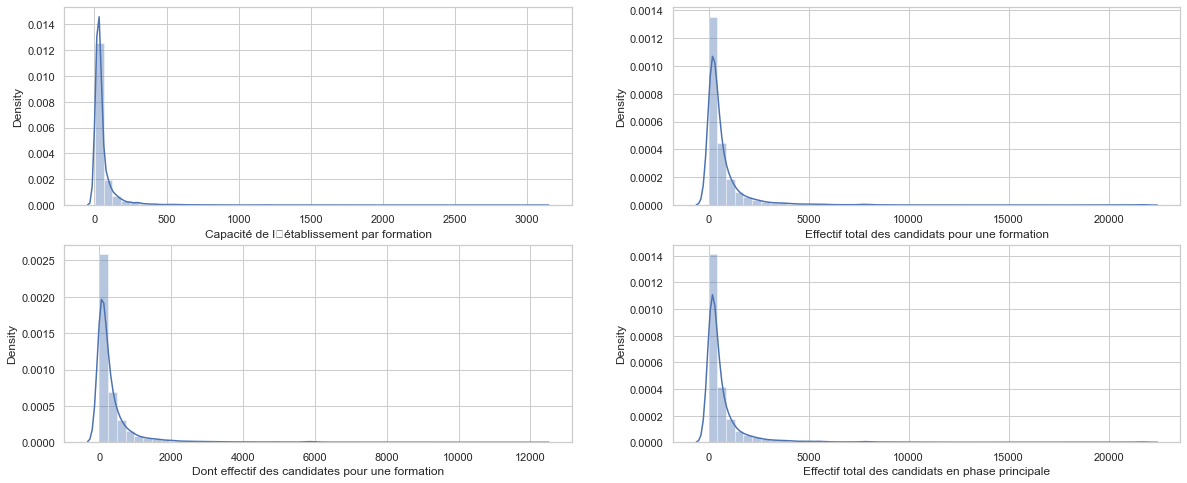

In [162]:
plt.figure(figsize=(20,8))
col=df.select_dtypes(['int64','float64']).columns
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col[i]])
plt.show()

-**Toutes les distributions sont dissymetriques à gauche**

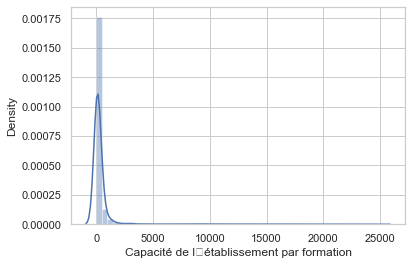

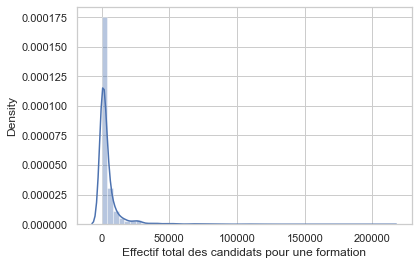

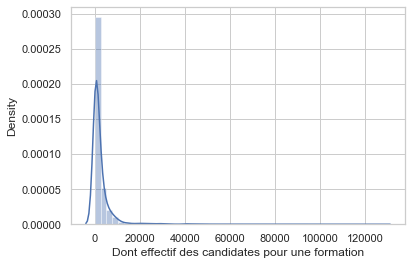

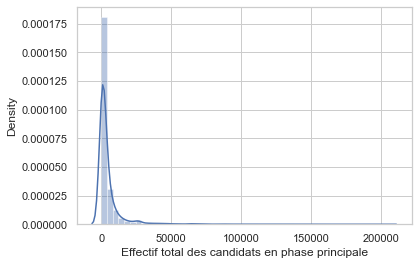

In [163]:
for col in df_resu:
    plt.figure()
    sns.distplot(df_resu[col])

## Conformité à la loi normale: test de de Kolmogorov-Smirnov

- **H0 : l’échantillon de chaque variable suit une loi normale**
- **H1 : l’échantillon de chaque variable ne suit pas une loi normale**

In [164]:
def Kolmogorov(col):
    alpha = 0.05
    stat, p =ks_2samp(df[col],list(np.random.normal(np.mean(df[col]), np.std(df[col]), 1000)))
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [165]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Kolmogorov(col)}')

 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


## Conformité à la loi normale: test de normalité d'Agostino

In [166]:
def Agostino(col):
    alpha = 0.05
    stat, p =stats.normaltest(df[col])
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [167]:
for col in df.select_dtypes('int64'):
    print(" ")
    print(f'{col :-<50} {Agostino(col)}')

 
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
 
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


### Quali 2018-2019 : nominale

In [168]:
sns.set_theme(style="whitegrid")

Ile-de-France                 4083
Auvergne-Rhône-Alpes          2647
Hauts-de-France               2146
Grand Est                     1913
Occitanie                     1894
Nouvelle-Aquitaine            1889
Provence Alpes Côte d'Azur    1358
Pays de la Loire              1282
Bretagne                      1184
Normandie                     1041
Bourgogne-Franche-Comté        954
Centre-Val de Loire            778
La Réunion                     331
Martinique                     197
Guadeloupe                     190
Polynésie française            120
Corse                          107
Guyane                          95
Mayotte                         53
Etranger                        12
Name: Région de létablissement, dtype: int64


<AxesSubplot:>

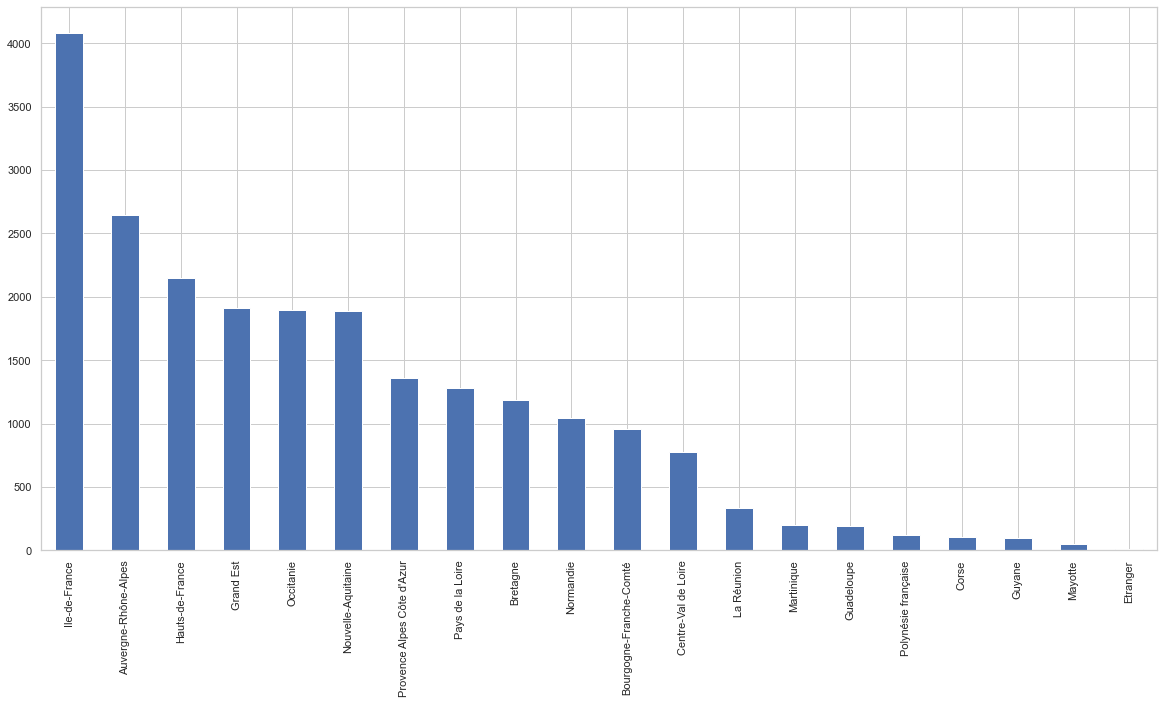

In [169]:
print(df['Région de l\x92établissement'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Région de l\x92établissement').size().plot.hist()
df['Région de l\x92établissement'].value_counts().plot.bar()

BTS - Services                                                               5678
BTS - Production                                                             3531
Licence - Arts-lettres-langues                                               2075
Licence - Sciences - technologies - santé                                    1166
BTSA                                                                         1000
Licence - Sciences humaines et sociales                                       978
DUT - Production                                                              948
Classe préparatoire scientifique                                              887
Licence - Droit-économie-gestion                                              802
DUT - Service                                                                 642
Formations d'ingénieurs                                                       629
Mention complémentaire                                                        577
Classe préparato

<AxesSubplot:>

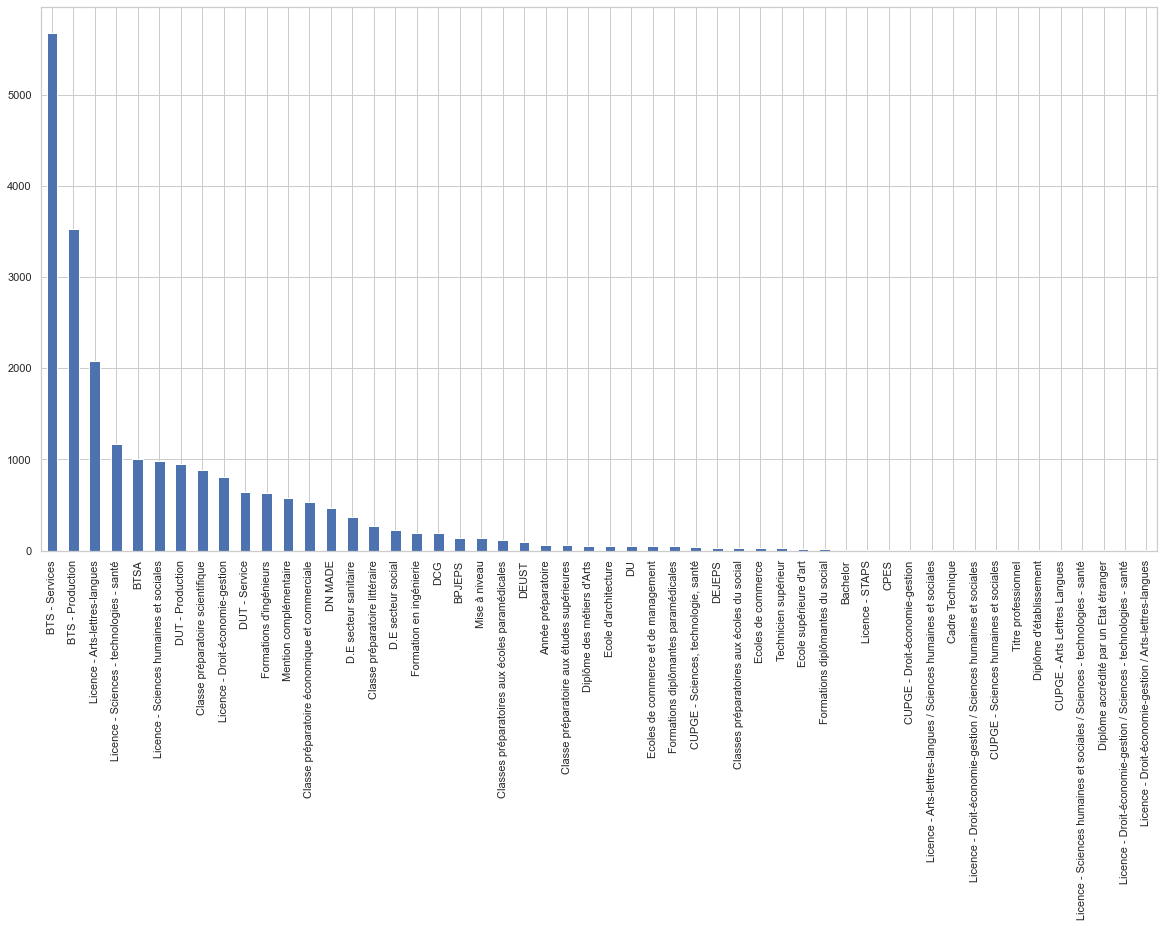

In [170]:
print(df['Filière de formation'].value_counts())
plt.figure(figsize=(20,10))
#df.groupby('Filière de formation').size().plot.hist()
df['Filière de formation'].value_counts().plot.bar()

## Quali  : session -2018-2019

2019    11577
2018    10697
Name: Session, dtype: int64


<AxesSubplot:>

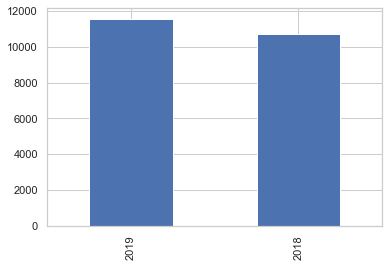

In [171]:
print(df['Session'].value_counts())
df['Session'].value_counts().plot.bar()

## quanti * quanti  2018 - 2019

<Figure size 1800x720 with 0 Axes>

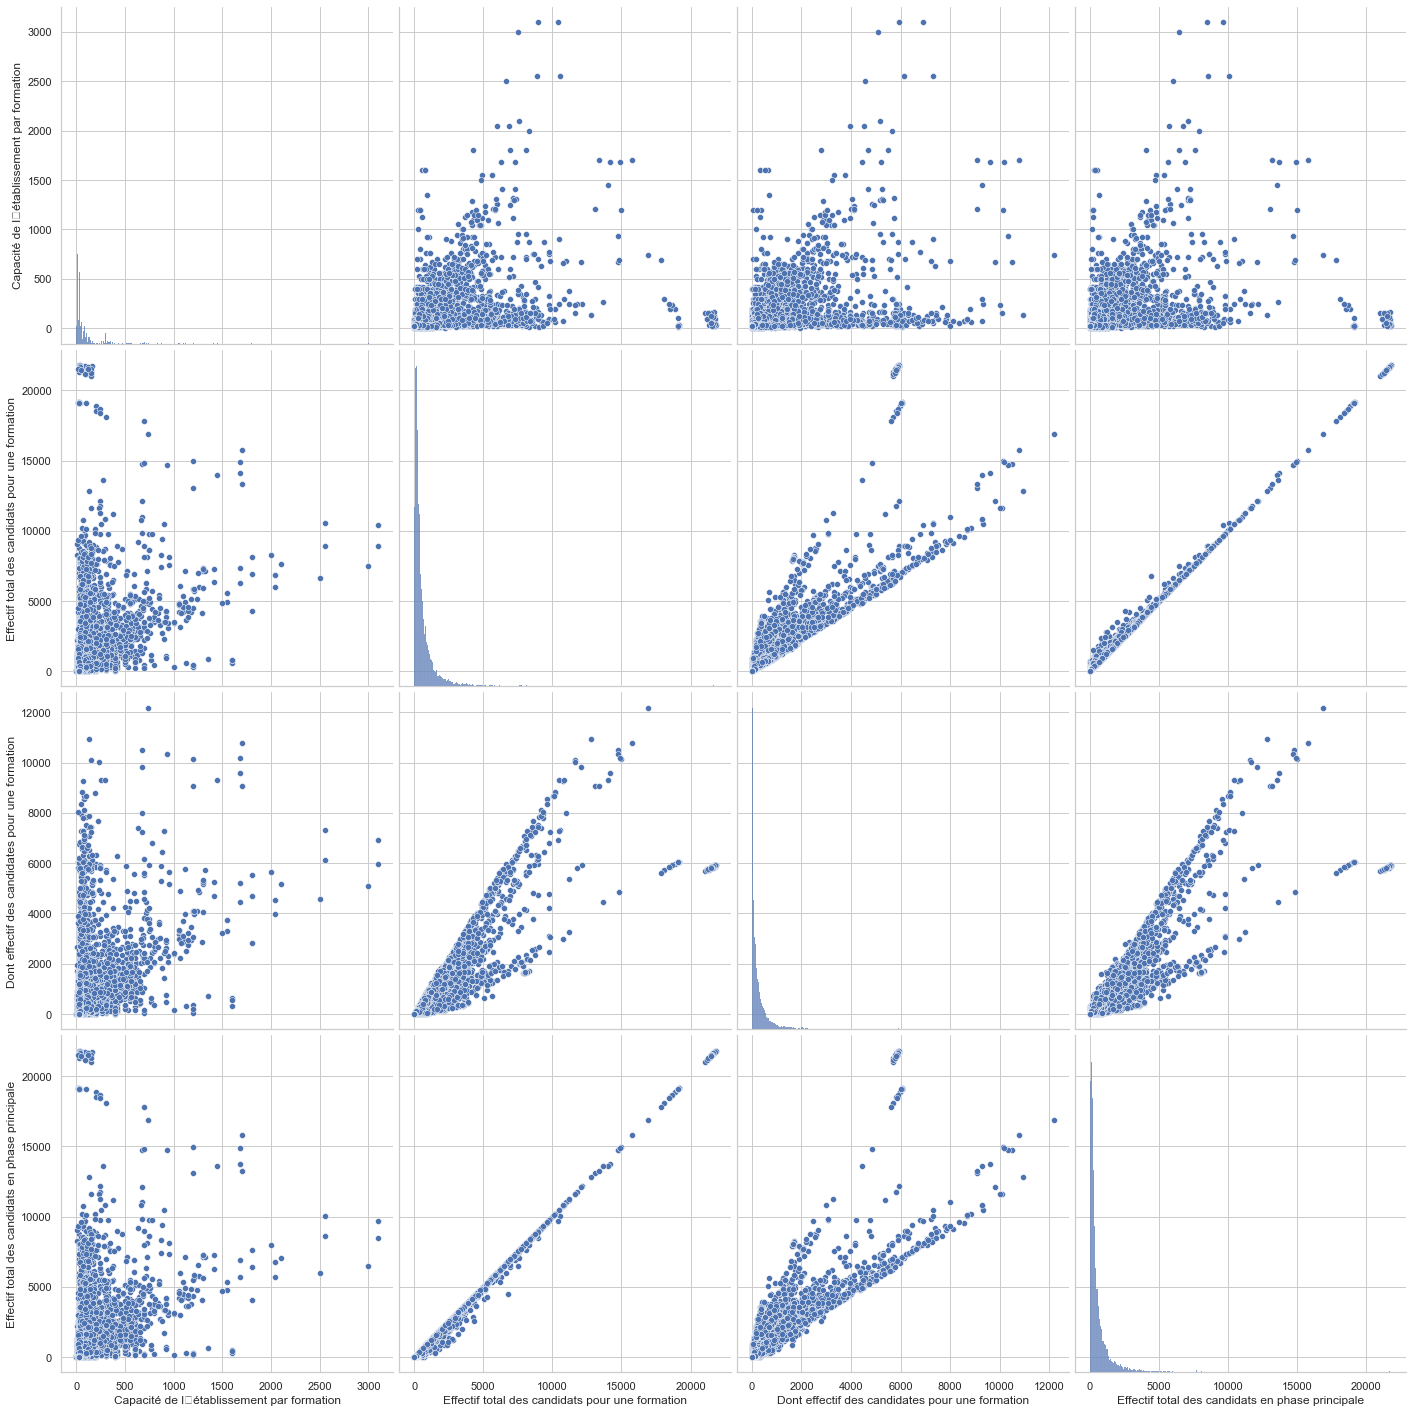

In [172]:
plt.figure(figsize=(25,10))
sns.pairplot(df.select_dtypes(['int64','float64']),size = 5)

-**les variables sont liées selon les dispersions,** 

<Figure size 1800x720 with 0 Axes>

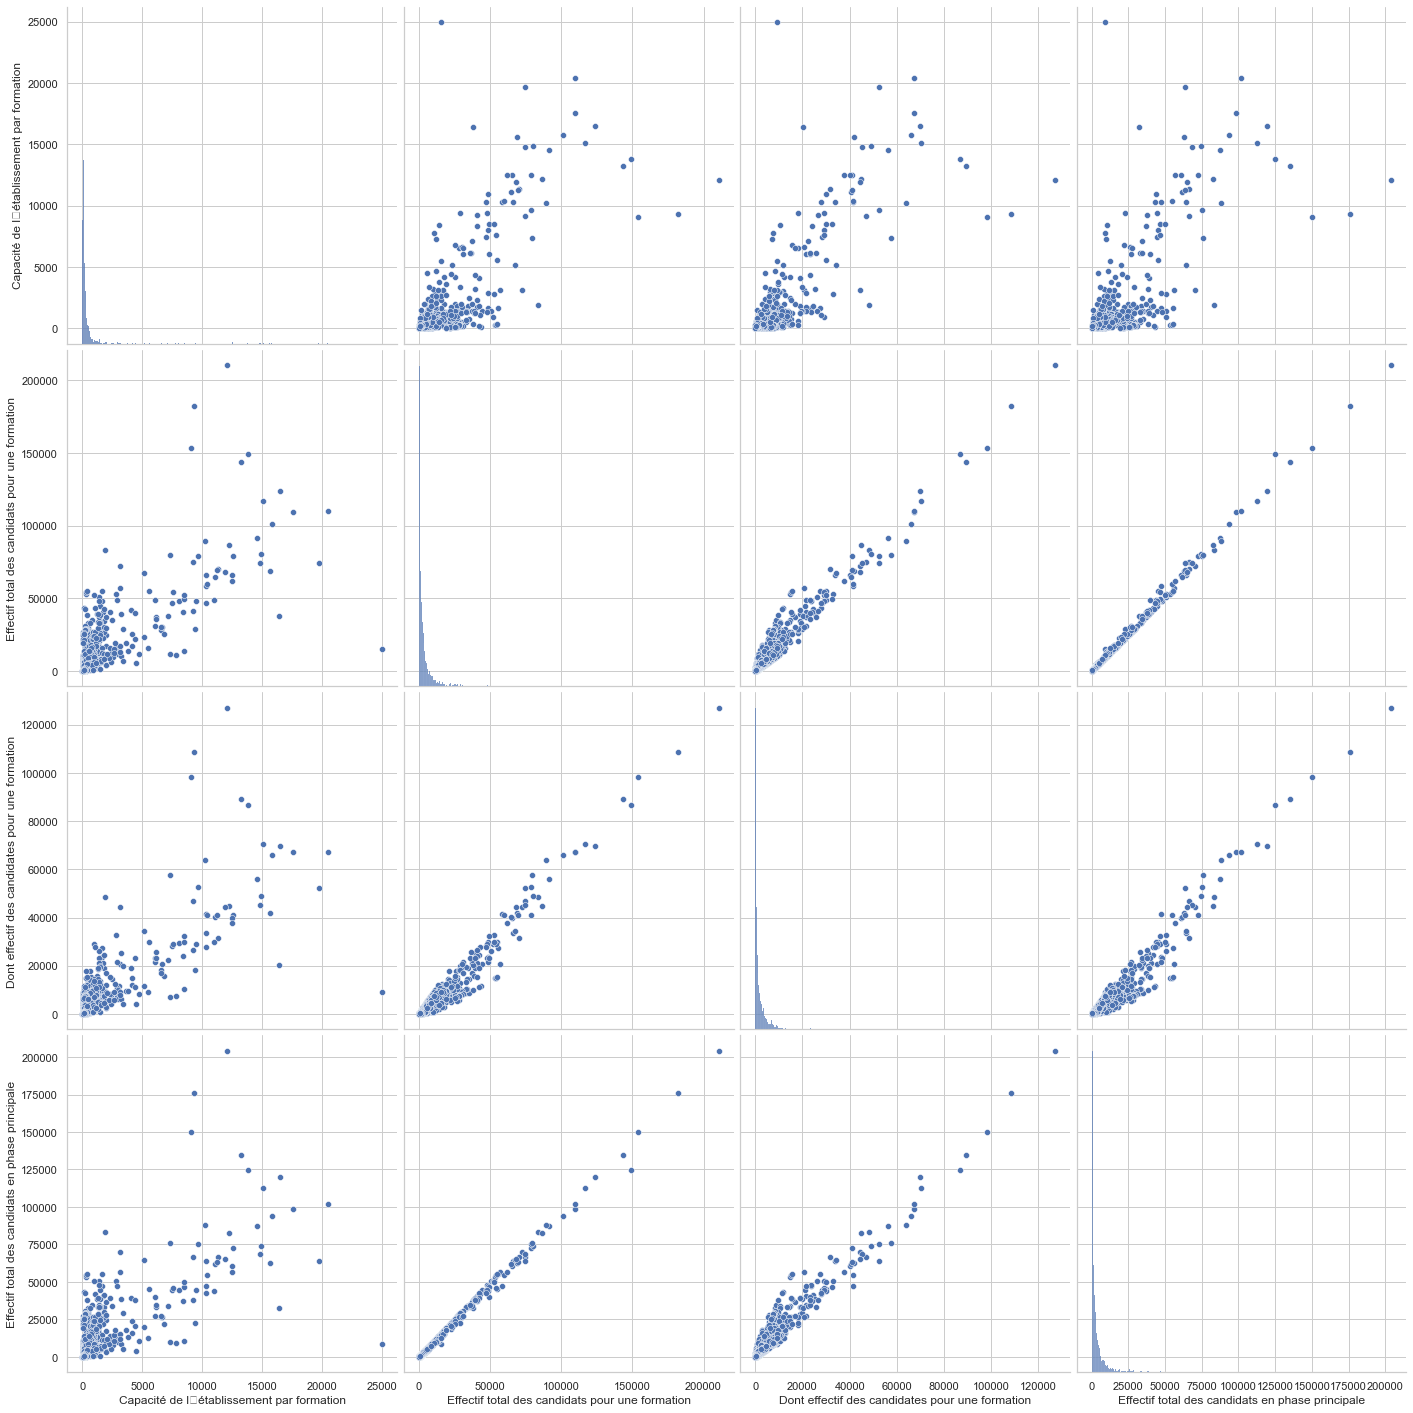

In [173]:
plt.figure(figsize=(25,10))
sns.pairplot(df_resu,size = 5)

<AxesSubplot:>

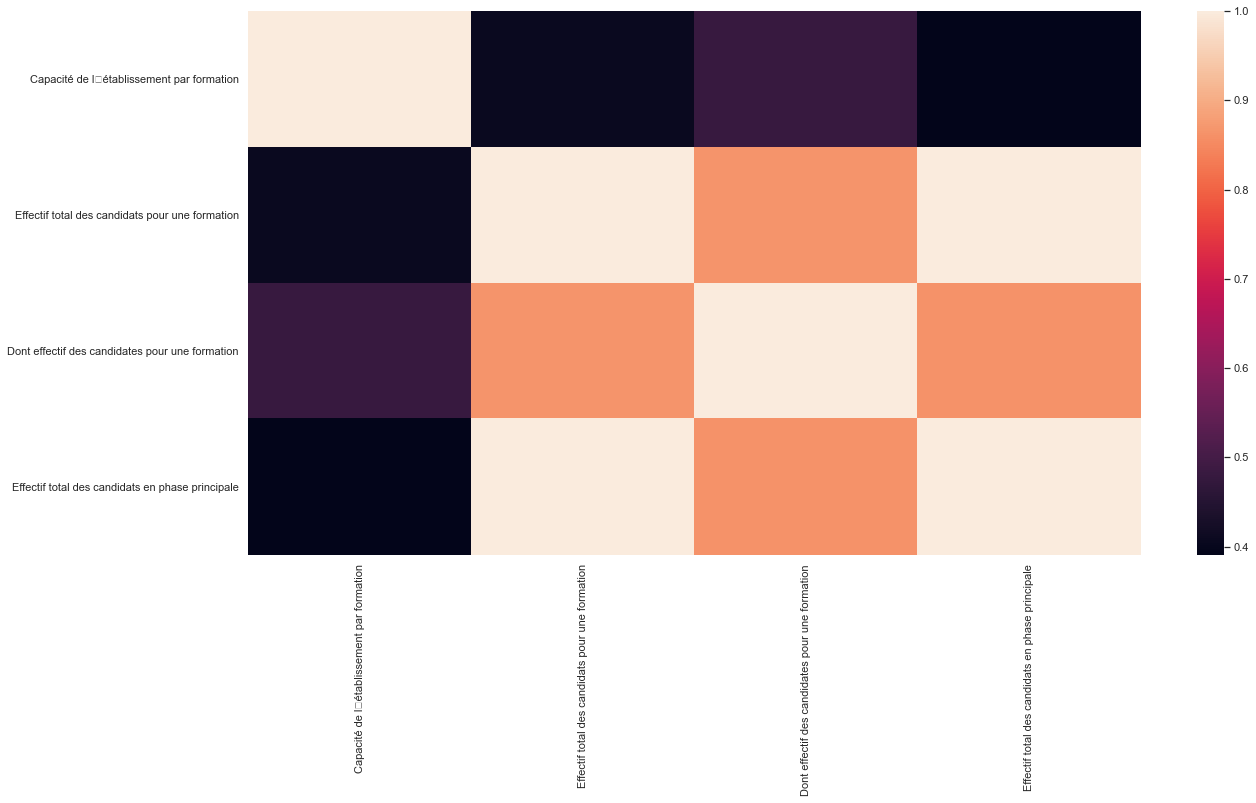

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(['int64','float64']).corr())

<AxesSubplot:>

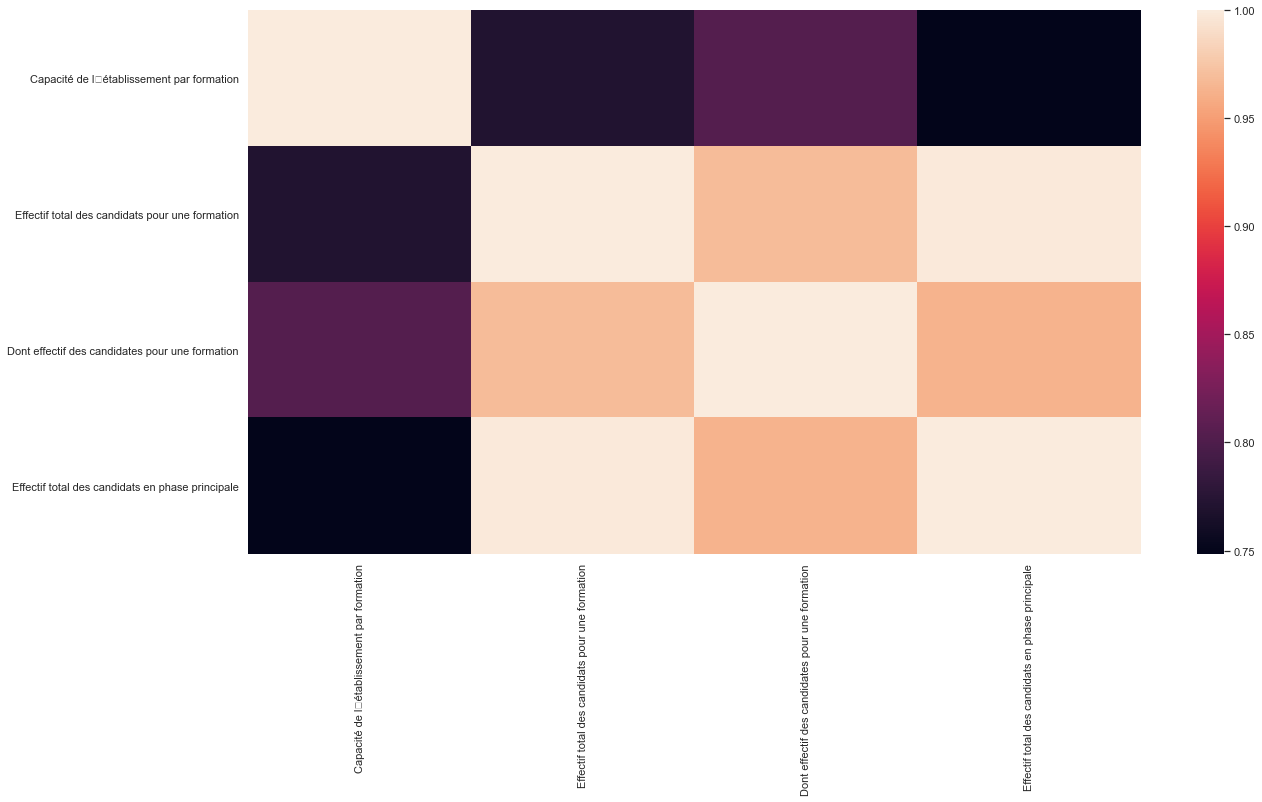

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(df_resu.corr())

<AxesSubplot:title={'center':'correlations des quanti'}>

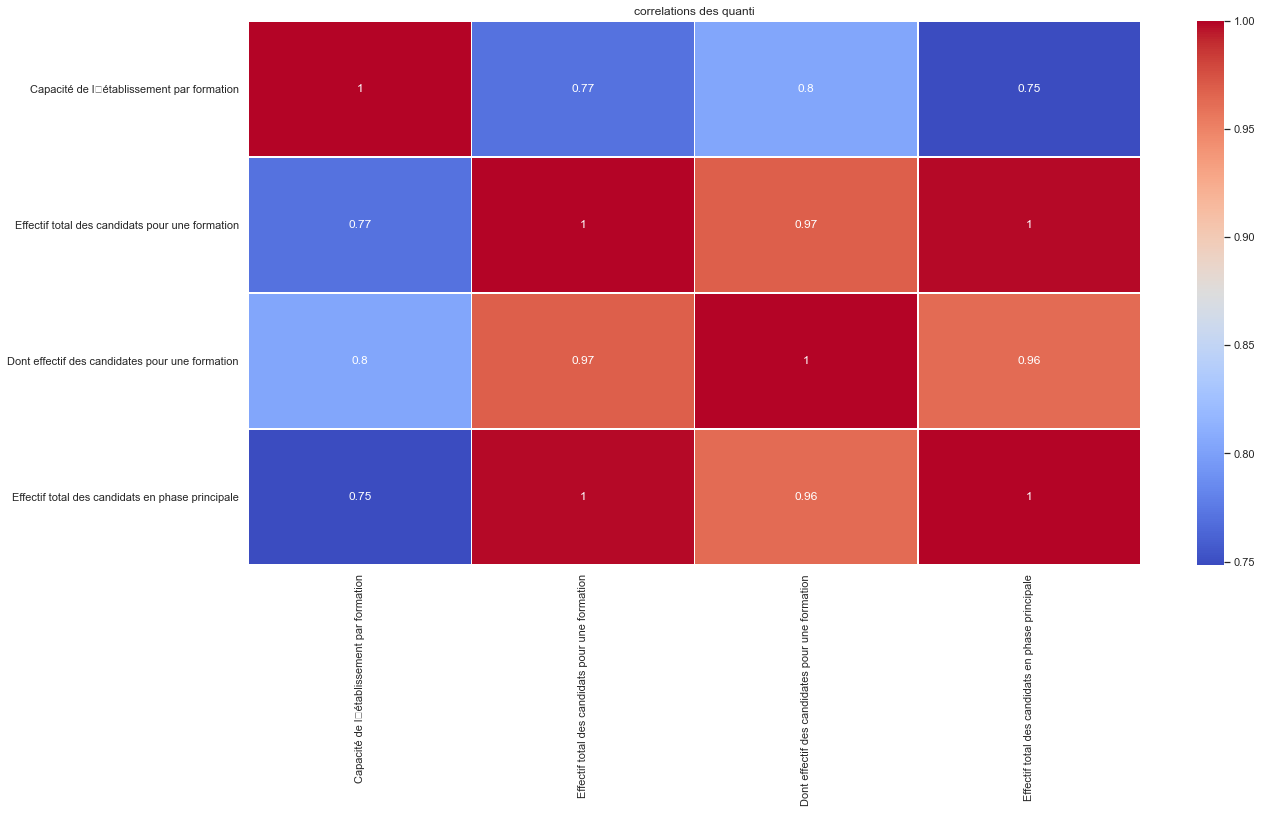

In [176]:
plt.figure(figsize=(20,10))
plt.title('correlations des quanti')
sns.heatmap(df_resu.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

In [177]:
corr_type, corr_matrix, corr_ps = rp.corr_case(df_resu)
print(corr_type)

  Pearson correlation test using list-wise deletion
0                    Total observations used = 3356


In [178]:
corr_matrix

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                                1   
Effectif total des candidats pour une formation                                     0.7708   
Dont effectif des candidates pour une formation                                     0.8036   
Effectif total des candidats en phase principale                                    0.7485   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                 0.7708   
Effectif total des candidats pour une formation                                                1   
Dont effectif des candidates pour une formation                                           0.9691   
Effectif total des candidats en phase principale                                          0.9986   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.8036   
Effectif total des candidats pour une formation                                           0.9691   
Dont effectif des candidates pour une formation                                                1   
Effectif total des candidats en phase principale                                          0.9635   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                  0.7485  
Effectif total des candidats pour une formation                                            0.9986  
Dont effectif des candidates pour une formation                                            0.9635  
Effectif total des candidats en phase principale                                                1

In [179]:
corr_ps

Capacité de létablissement par formation  \
Capacité de létablissement par formation                                           0.0000   
Effectif total des candidats pour une formation                                     0.0000   
Dont effectif des candidates pour une formation                                     0.0000   
Effectif total des candidats en phase principale                                    0.0000   

                                                 Effectif total des candidats pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Dont effectif des candidates pour une formation  \
Capacité de létablissement par formation                                                 0.0000   
Effectif total des candidats pour une formation                                           0.0000   
Dont effectif des candidates pour une formation                                           0.0000   
Effectif total des candidats en phase principale                                          0.0000   

                                                 Effectif total des candidats en phase principale  
Capacité de létablissement par formation                                                  0.0000  
Effectif total des candidats pour une formation                                            0.0000  
Dont effectif des candidates pour une formation                                            0.0000  
Effectif total des candidats en phase principale                                           0.0000

In [180]:
rp.corr_pair(df.select_dtypes(['int64','float64']))

r value p-value      N
Capacité de létablissement par formation & Eff...  0.4052  0.0000  22255
Capacité de létablissement par formation & Don...  0.4790  0.0000  22255
Capacité de létablissement par formation & Eff...  0.3908  0.0000  22255
Effectif total des candidats pour une formation...  0.8658  0.0000  22274
Effectif total des candidats pour une formation...  0.9986  0.0000  22274
Dont effectif des candidates pour une formation...  0.8625  0.0000  22274

-**les variables sont liées de façon significatif au niveau 5%**

## quali * quali 2018 - 2019

In [39]:
Tc=pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation'])
Tc

Filière de formation        Année préparatoire  BPJEPS  BTS - Production  \
Région de létablissement                                                  
Auvergne-Rhône-Alpes                         2      15               402   
Bourgogne-Franche-Comté                      2       9               183   
Bretagne                                     7       7               191   
Centre-Val de Loire                          0       9               142   
Corse                                        0       0                10   
Etranger                                     0       0                 0   
Grand Est                                    4      23               344   
Guadeloupe                                   0       4                30   
Guyane                                       0       0                 8   
Hauts-de-France                              2      11               359   
Ile-de-France                                6      13               461   
La Réunion                                   4       5                69   
Martinique                                   0       0                37   
Mayotte                                      0       0                 6   
Normandie                                    2       0               204   
Nouvelle-Aquitaine                           6      15               286   
Occitanie                                    8      12               339   
Pays de la Loire                             9       9               195   
Polynésie française                          0       0                14   
Provence Alpes Côte d'Azur                  11      10               251   

Filière de formation        BTS - Services  BTSA  Bachelor  CPES  \
Région de létablissement                                          
Auvergne-Rhône-Alpes                   638   143         0     0   
Bourgogne-Franche-Comté                231    75         0     0   
Bretagne                               270    83         2     0   
Centre-Val de Loire                    213    41         0     0   
Corse                                   21     6         0     0   
Etranger                                 0     0         0     0   
Grand Est                              473    81         0     0   
Guadeloupe                              77     4         0     0   
Guyane                                  29     4         0     0   
Hauts-de-France                        643    75         0     0   
Ile-de-France                          932    32         5     6   
La Réunion                             109     8         0     0   
Martinique                              71     4         0     0   
Mayotte                                 22     0         0     0   
Normandie                              276    58         2     0   
Nouvelle-Aquitaine                     448   150         0     0   
Occitanie                              471   118         0     0   
Pays de la Loire                       348    86         1     0   
Polynésie française                     44     2         0     0   
Provence Alpes Côte d'Azur             362    30         0     0   

Filière de formation        CUPGE - Arts Lettres Langues  \
Région de létablissement                                  
Auvergne-Rhône-Alpes                                   0   
Bourgogne-Franche-Comté                                0   
Bretagne                                               0   
Centre-Val de Loire                                    0   
Corse                                                  0   
Etranger                                               0   
Grand Est                                              2   
Guadeloupe                                             0   
Guyane                                                 0   
Hauts-de-France                                        0   
Ile-de-France                                          0   
La Réunion                                        

In [182]:
pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation'],margins=True)

Filière de formation        Année préparatoire  BPJEPS  BTS - Production  \
Région de létablissement                                                  
Auvergne-Rhône-Alpes                         2      15               402   
Bourgogne-Franche-Comté                      2       9               183   
Bretagne                                     7       7               191   
Centre-Val de Loire                          0       9               142   
Corse                                        0       0                10   
Etranger                                     0       0                 0   
Grand Est                                    4      23               344   
Guadeloupe                                   0       4                30   
Guyane                                       0       0                 8   
Hauts-de-France                              2      11               359   
Ile-de-France                                6      13               461   
La Réunion                                   4       5                69   
Martinique                                   0       0                37   
Mayotte                                      0       0                 6   
Normandie                                    2       0               204   
Nouvelle-Aquitaine                           6      15               286   
Occitanie                                    8      12               339   
Pays de la Loire                             9       9               195   
Polynésie française                          0       0                14   
Provence Alpes Côte d'Azur                  11      10               251   
All                                         63     142              3531   

Filière de formation        BTS - Services  BTSA  Bachelor  CPES  \
Région de létablissement                                          
Auvergne-Rhône-Alpes                   638   143         0     0   
Bourgogne-Franche-Comté                231    75         0     0   
Bretagne                               270    83         2     0   
Centre-Val de Loire                    213    41         0     0   
Corse                                   21     6         0     0   
Etranger                                 0     0         0     0   
Grand Est                              473    81         0     0   
Guadeloupe                              77     4         0     0   
Guyane                                  29     4         0     0   
Hauts-de-France                        643    75         0     0   
Ile-de-France                          932    32         5     6   
La Réunion                             109     8         0     0   
Martinique                              71     4         0     0   
Mayotte                                 22     0         0     0   
Normandie                              276    58         2     0   
Nouvelle-Aquitaine                     448   150         0     0   
Occitanie                              471   118         0     0   
Pays de la Loire                       348    86         1     0   
Polynésie française                     44     2         0     0   
Provence Alpes Côte d'Azur             362    30         0     0   
All                                   5678  1000        10     6   

Filière de formation        CUPGE - Arts Lettres Langues  \
Région de létablissement                                  
Auvergne-Rhône-Alpes                                   0   
Bourgogne-Franche-Comté                                0   
Bretagne                                               0   
Centre-Val de Loire                                    0   
Corse                                                  0   
Etranger                                               0   
Grand Est                                              2   
Guadeloupe                                             0   
Guyane                                                 0   
Hauts-de-France           

<AxesSubplot:xlabel='Filière de formation', ylabel='Région de l\x92établissement'>

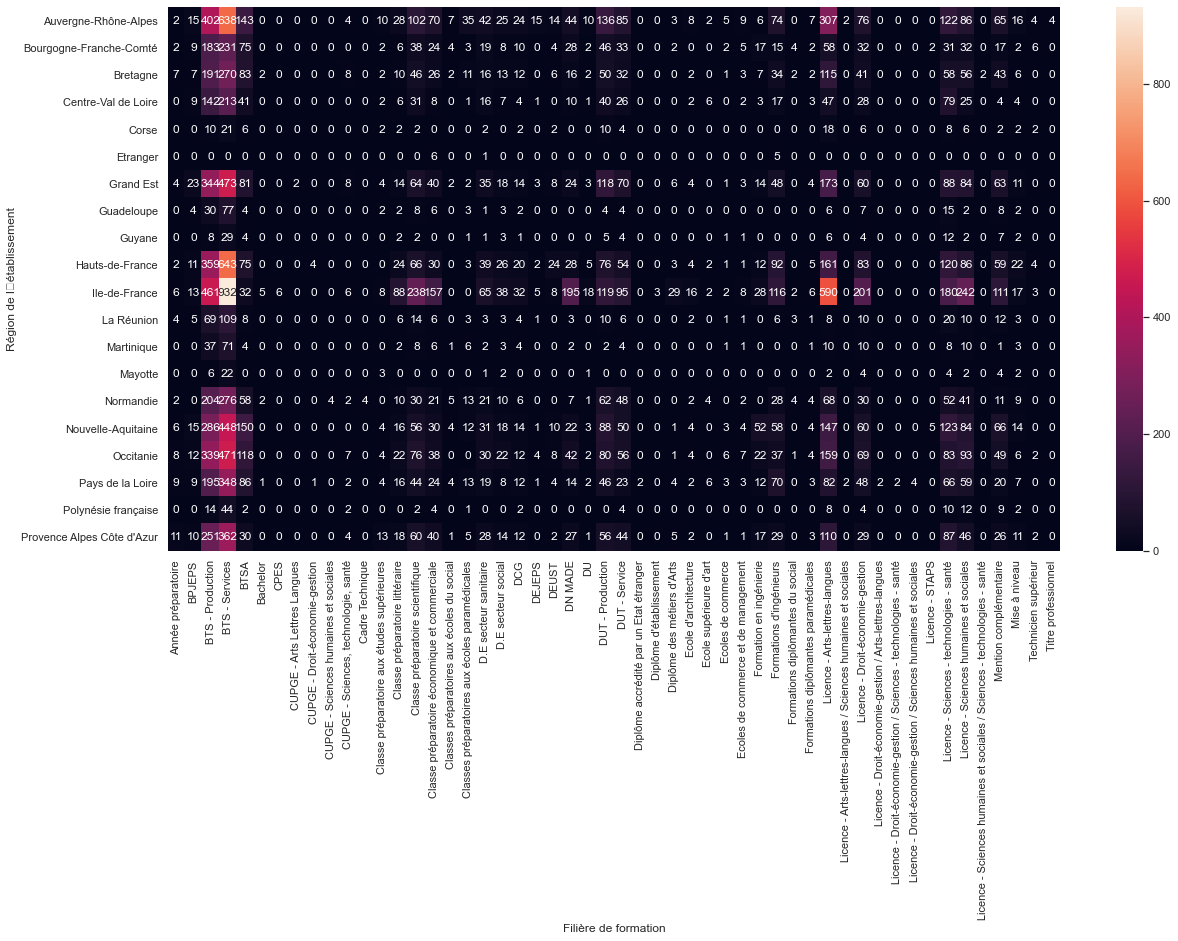

In [183]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation']),annot=True,fmt='d')

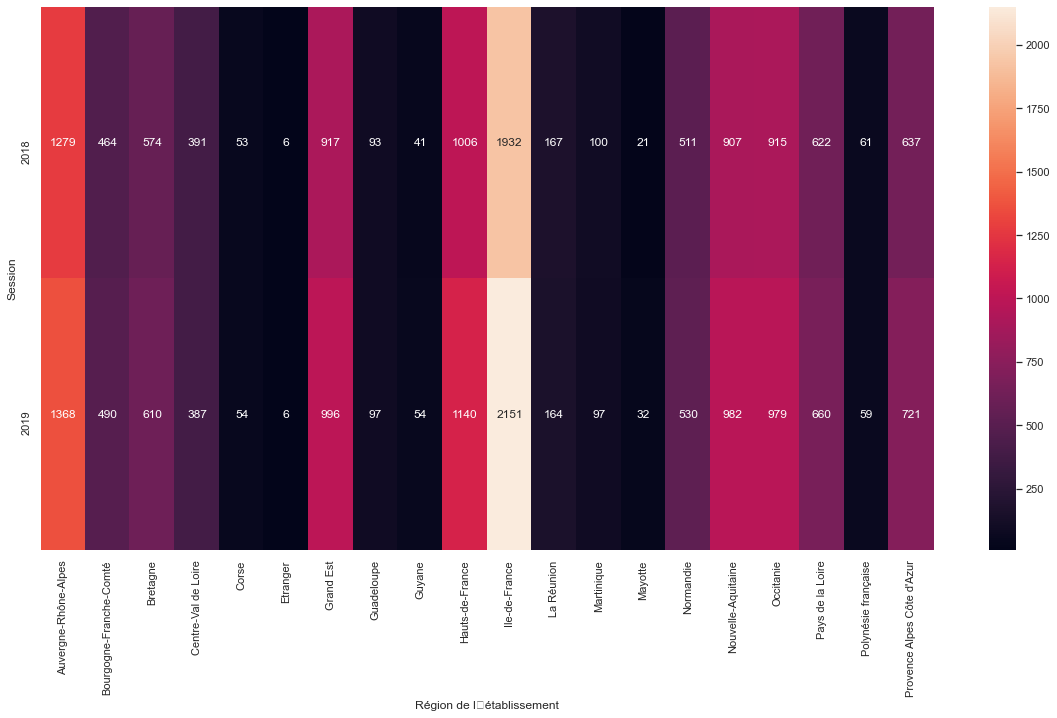

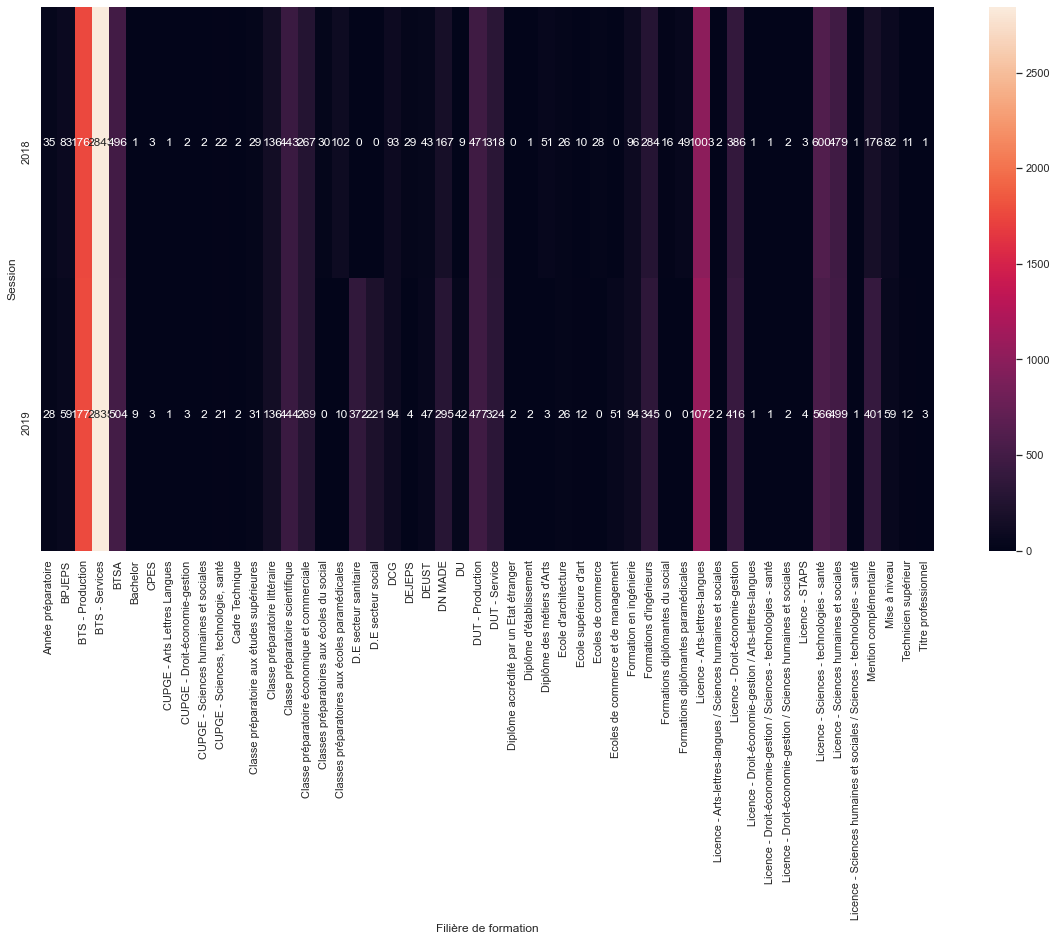

In [184]:
for col in df[['Région de l\x92établissement','Filière de formation']]:
        plt.figure(figsize=(20,10))
        sns.heatmap(pd.crosstab(df['Session'],df[col]),annot=True,fmt='d')

## Test d’indépendance de khi deux

- **H0 : les deux variables sont indépendantes**
- **H1 : les deux variables sont liées**

In [185]:
def khi_deux(df):
    alpha = 0.05
    stat, p, dof, expected =chi2_contingency(df)
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [186]:
khi_deux(pd.crosstab(df['Région de l\x92établissement'], df['Filière de formation']))

'H0 Rejetée -- test significatif au niveau 5%'

In [187]:
khi_deux(pd.crosstab(df['Session'], df['Filière de formation']))

'H0 Rejetée -- test significatif au niveau 5%'

In [188]:
khi_deux(pd.crosstab(df['Région de l\x92établissement'], df['Session']))

'Non H0 Rejetée -- test non significatif au niveau 5%'

### Quanti Quali 2018 - 2019

In [189]:
col=df.select_dtypes(['int64','float64','category']).columns.tolist()

<Figure size 1440x720 with 0 Axes>

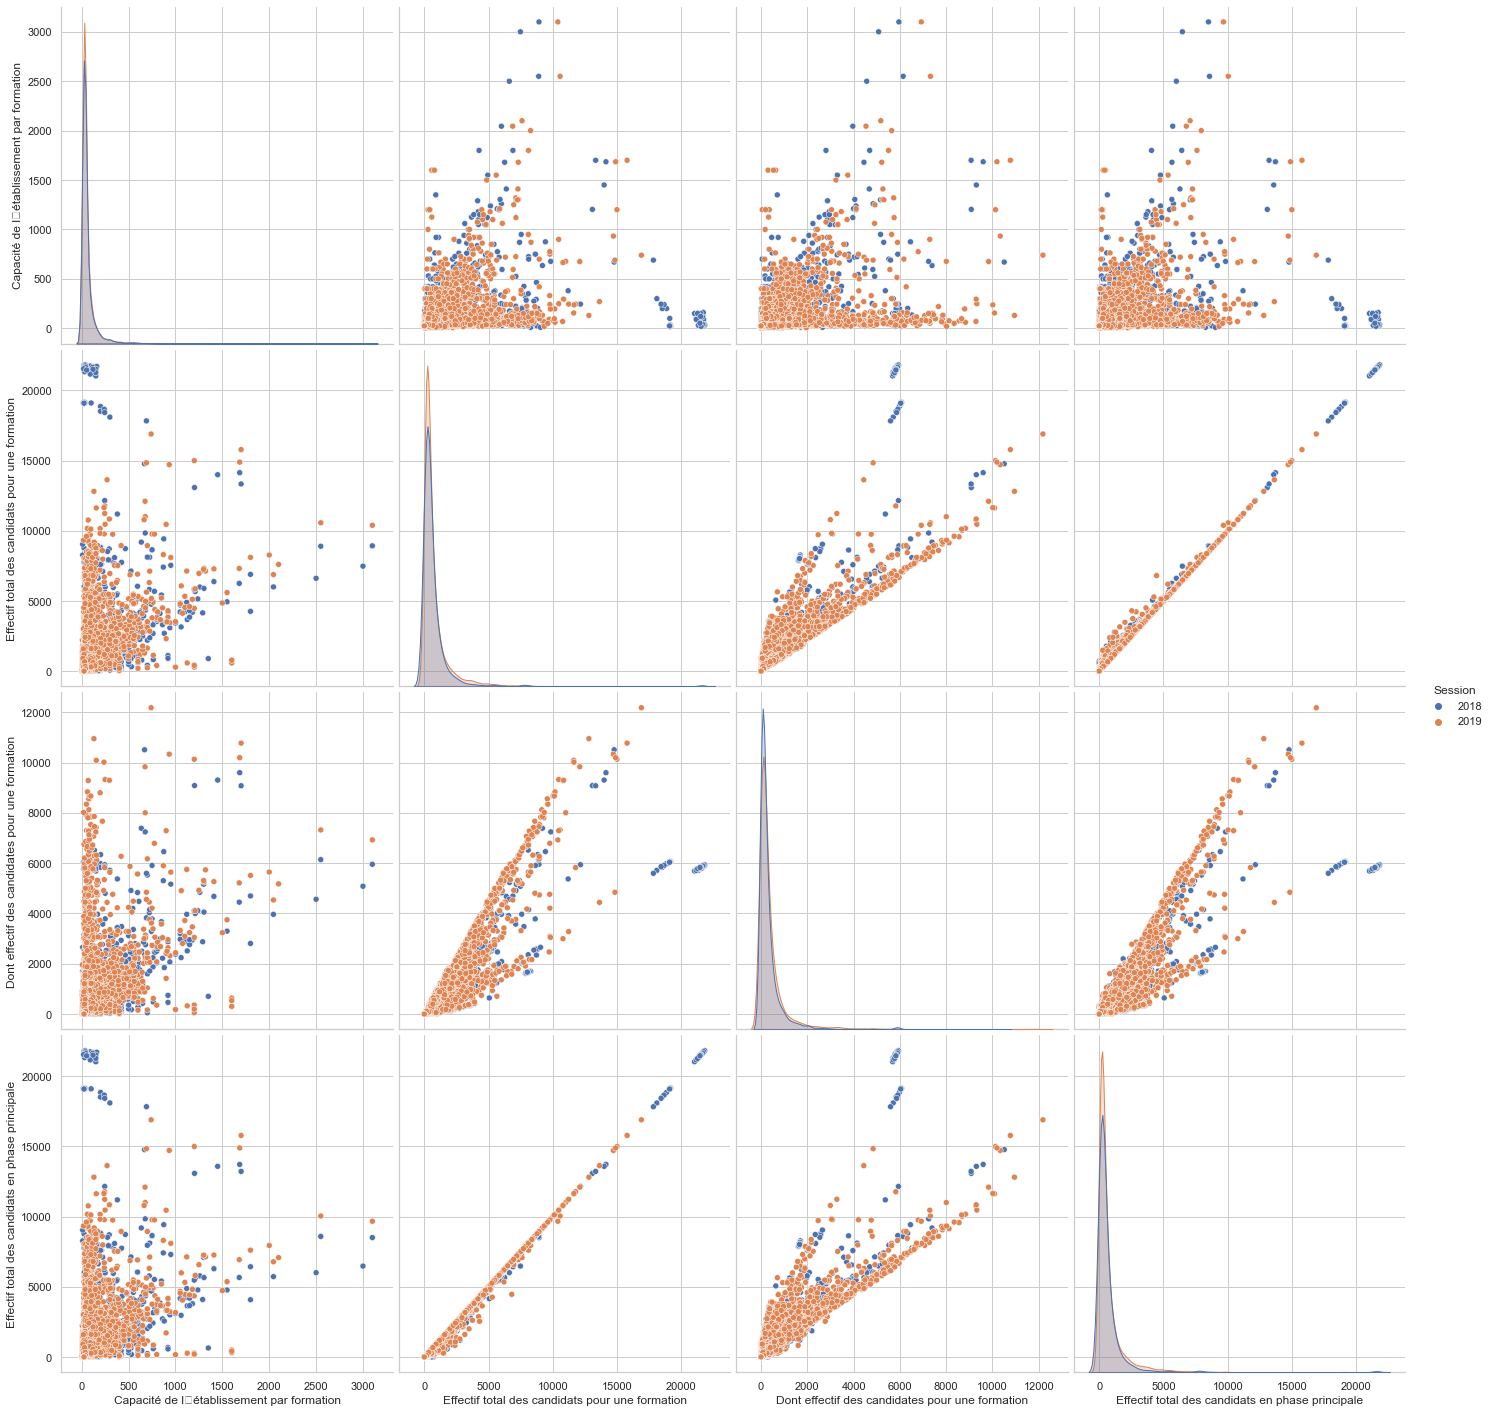

In [190]:
plt.figure(figsize=(20,10))
sns.pairplot(df[col],hue="Session",size = 5)

Text(0.5, 0.98, 'DATAVIZ')

<Figure size 1440x720 with 0 Axes>

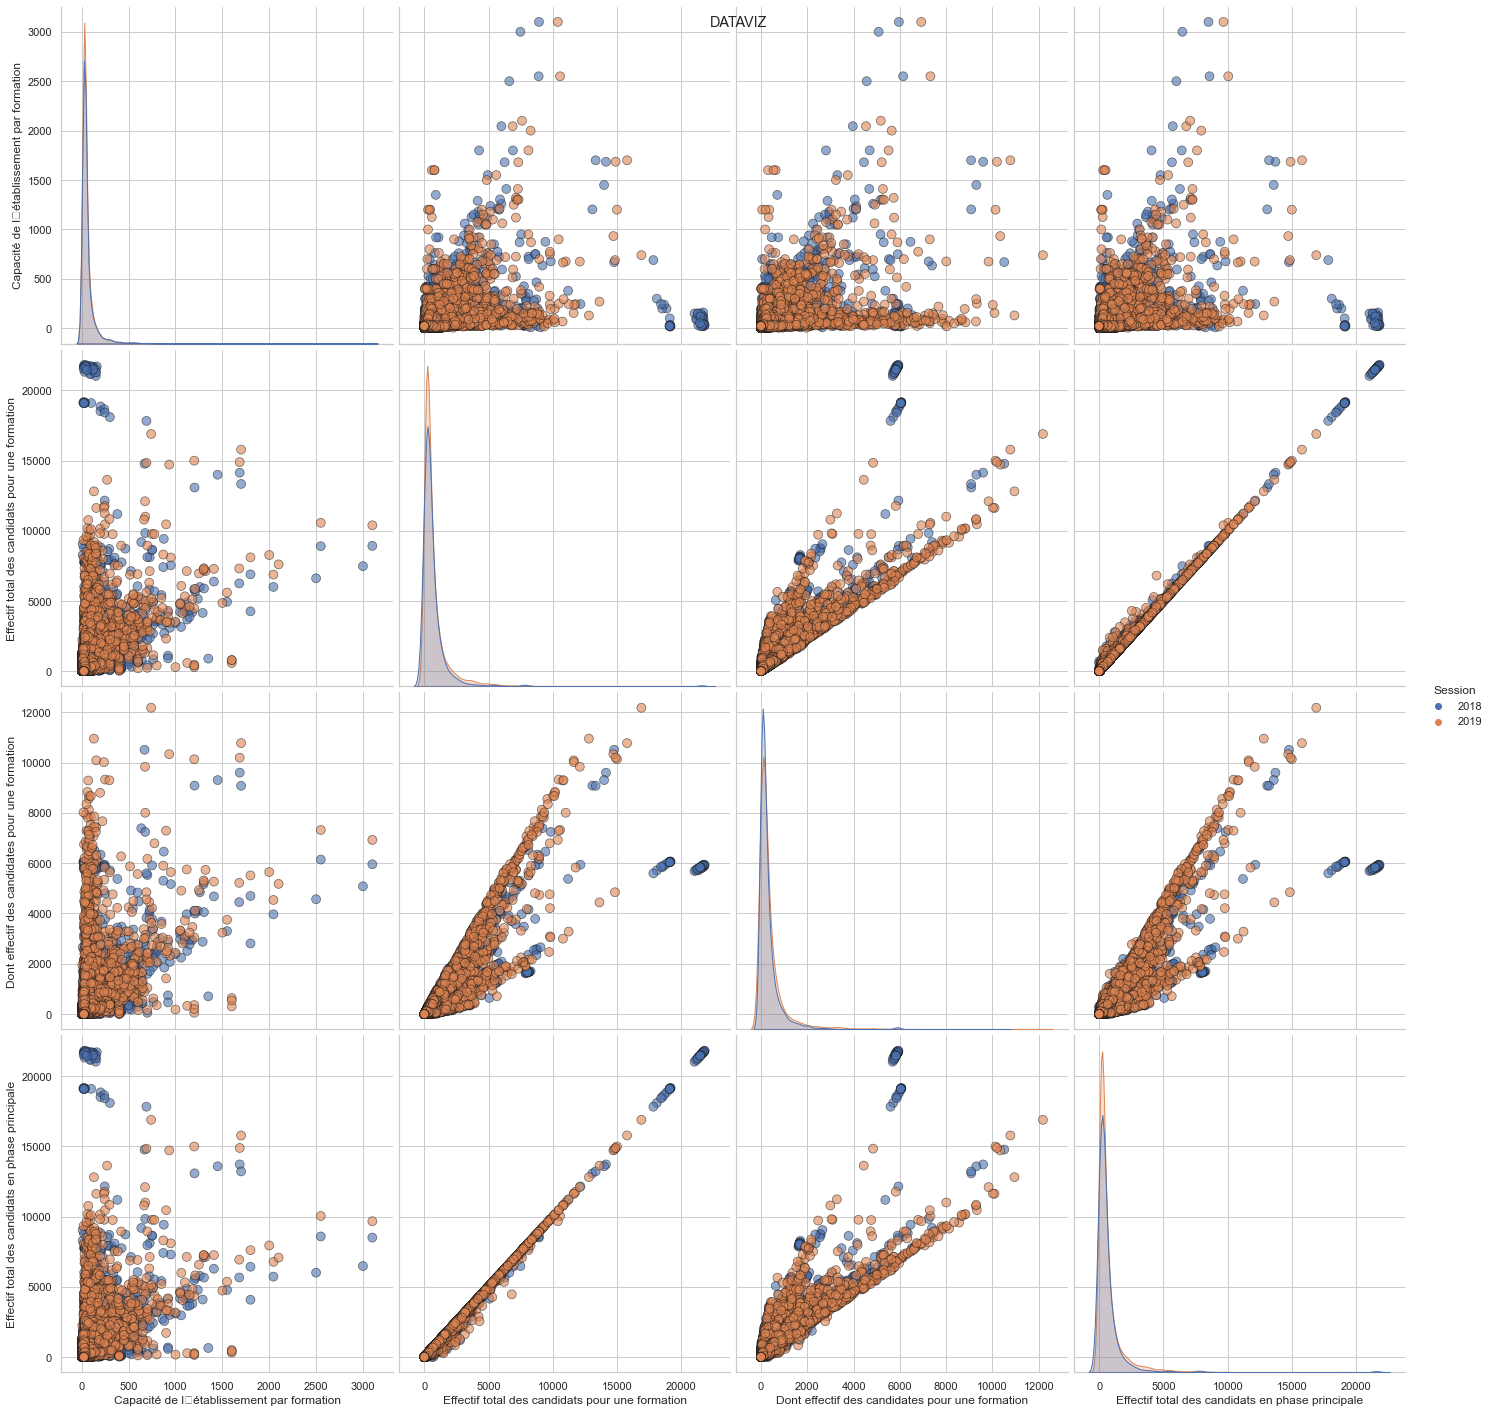

In [191]:
plt.figure(figsize=(20,10))
sns.pairplot(df[col], hue = 'Session', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 5)
plt.suptitle('DATAVIZ')


### Comparaison 2018 - 2019

In [192]:
df_select=df[col]
df_2018=df_select[df_select['Session'].astype('str')=='2018']
df_2019=df_select[df_select['Session'].astype('str')=='2019']

In [193]:
col_select=df_select.select_dtypes(['int64','float64']).columns
col_select

Index(['Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'],
      dtype='object')

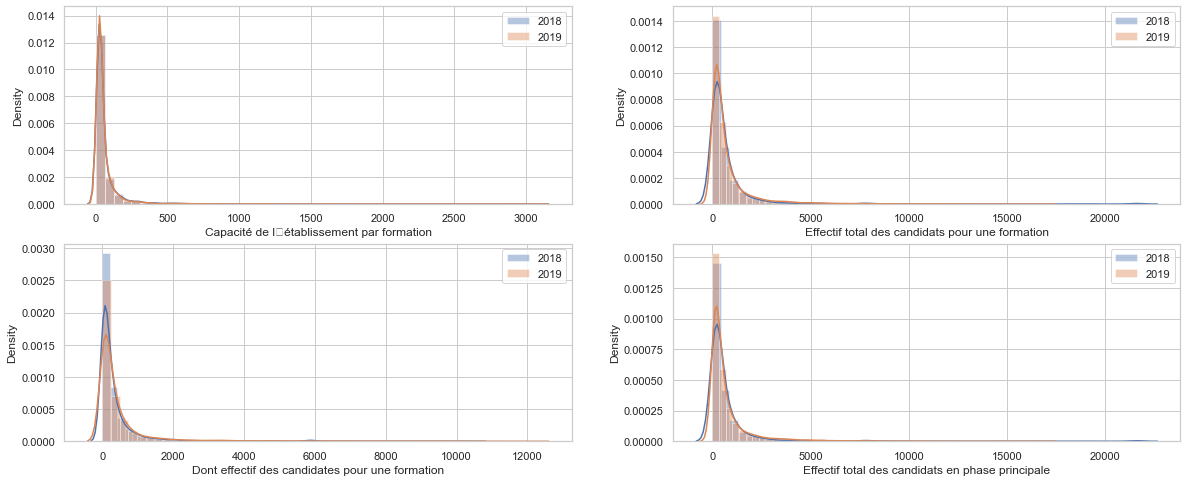

In [194]:
plt.figure(figsize=(20,8))
col_select=df_select.select_dtypes(['int64','float64']).columns
for i in range(len(col_select)):
    plt.subplot(2,2,i+1)
    sns.distplot(df_2018[col_select[i]], label='2018')
    sns.distplot(df_2019[col_select[i]], label='2019')
    plt.legend()
    #plt.tight_layout()
plt.show()

-**les distributions sont dissymetriques plus en 2019 qu'en 2018, pas de trop similarités**

In [195]:
#for c in df_select.select_dtypes(['int64','float64']):
   # plt.figure()
 #   sns.distplot(df_2018[c], label='2018')
   # sns.distplot(df_2019[c], label='2019')
   # plt.legend()
    

### Comparaison de moyennes

### Test d’égalité de variances
- **H0 : égalité des variances**
- **H1 : pas d’égalité des variances**


### Test d’égalité des moyennes
- **H0 : égalité des moyennes**
- **H1 : pas d’égalité des moyennes**


In [196]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(df_2018[col],df_2019[col])
    if p < alpha:
        return 'H0 Rejetée -- test significatif au niveau 5%'
    else :
        return 'Non H0 Rejetée -- test non significatif au niveau 5%'

In [197]:
for col in df_select:
    print(f'{col :-<50} {t_test(col)}')

Session------------------------------------------- H0 Rejetée -- test significatif au niveau 5%
Capacité de létablissement par formation--------- Non H0 Rejetée -- test non significatif au niveau 5%
Effectif total des candidats pour une formation--- H0 Rejetée -- test significatif au niveau 5%
Dont effectif des candidates pour une formation--- H0 Rejetée -- test significatif au niveau 5%
Effectif total des candidats en phase principale-- H0 Rejetée -- test significatif au niveau 5%


# Modélisation

## ACP quanti 2018-2019 (méthode 1)

In [198]:
from fanalysis.pca import PCA

In [199]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values
features = df_resu.columns.values
names=df_resu.index.values

In [200]:
res_pca = PCA(std_unit=True,row_labels=names, col_labels=features)

In [201]:
res_pca

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3IL', '3iL', 'ADES FORMATIONS', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [202]:
res_pca.fit(X)

PCA(col_labels=array(['Capacité de l\x92établissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'], dtype=object),
    row_labels=array(['3IL', '3iL', 'ADES FORMATIONS', ...,
       "École Nationale des Techniciens de l'Équipement (ENTE) - Etablissement de Valenciennes",
       "École Nationale des Techniciens de l'Équipement (ENTE) - Site d'Aix-en-Provence",
       "École Supérieure d'Art du Nord-Pas de Calais : Dunkerque-Tourcoing"],
      dtype=object))

In [203]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_pca.eig_[0] )
print("les valeurs propres en pourcentage de la variance totale ", res_pca.eig_[1] )
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_pca.eig_[2] )

les valeurs propres en valeur absolue  [3.63636754e+00 3.23750890e-01 3.90853622e-02 7.96203421e-04]
les valeurs propres en pourcentage de la variance totale  [9.09091886e+01 8.09377226e+00 9.77134054e-01 1.99050855e-02]
les valeurs propres en pourcentage cumulé de la variance totale  [ 90.9091886   99.00296086  99.98009491 100.        ]


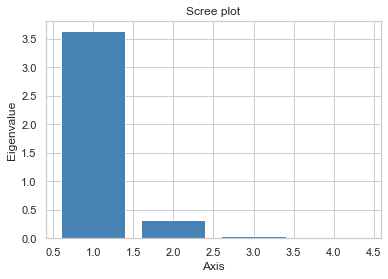

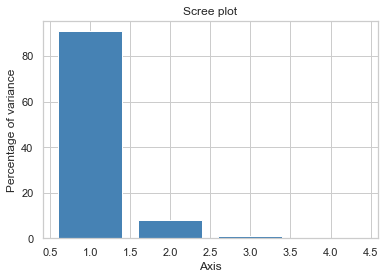

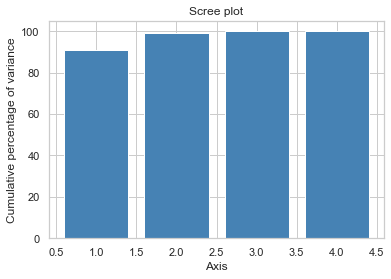

In [204]:
res_pca.plot_eigenvalues()
res_pca.plot_eigenvalues(type="percentage")
res_pca.plot_eigenvalues(type="cumulative")

#### graphiques

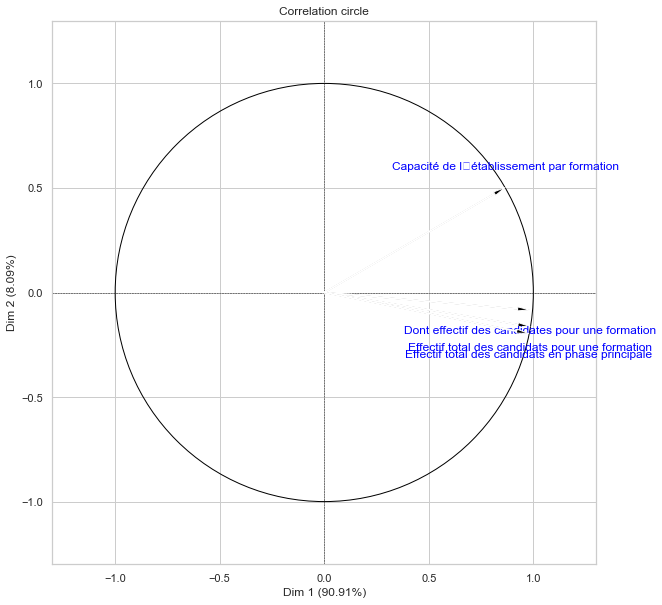

In [205]:
#res_pca.correlation_circle(num_x_axis=1, num_y_axis=2)
res_pca.correlation_circle(1, 2, figsize=(12, 10))

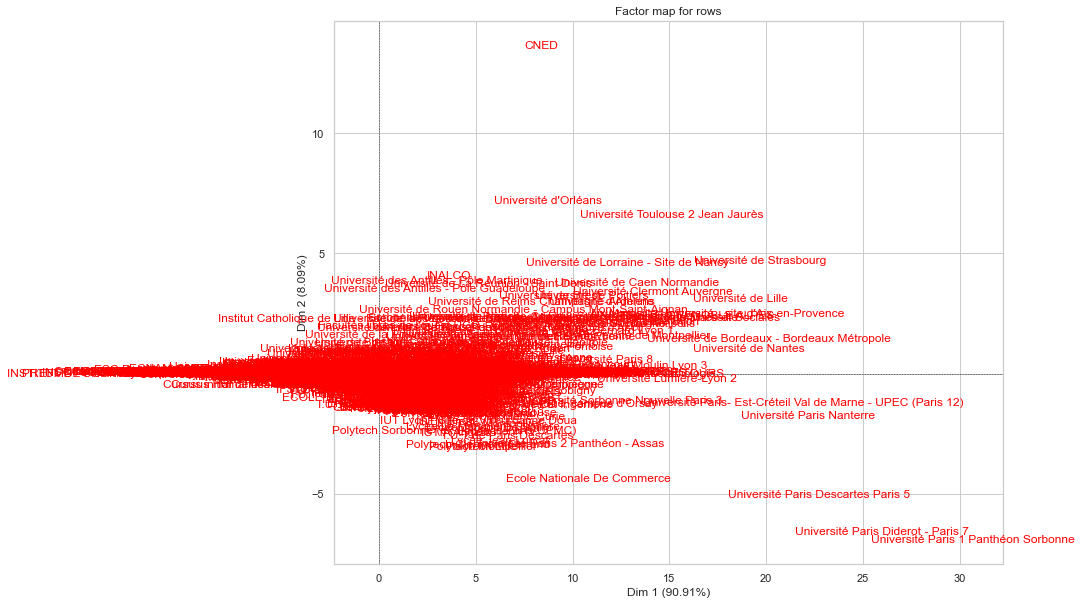

In [206]:
#res_pca.mapping_row(num_x_axis=1, num_y_axis=2)
res_pca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les individus

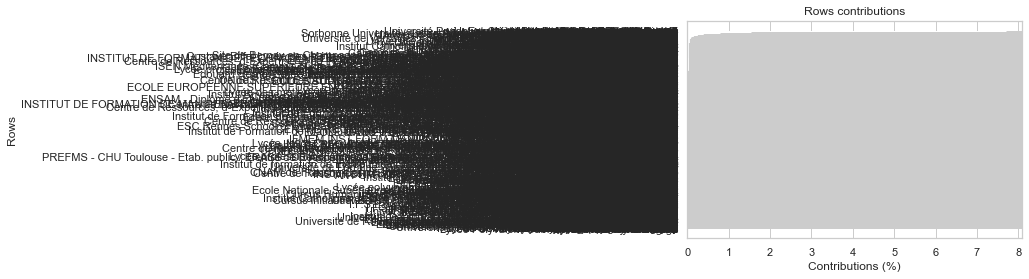

In [207]:
res_pca.plot_row_contrib(num_axis=1)

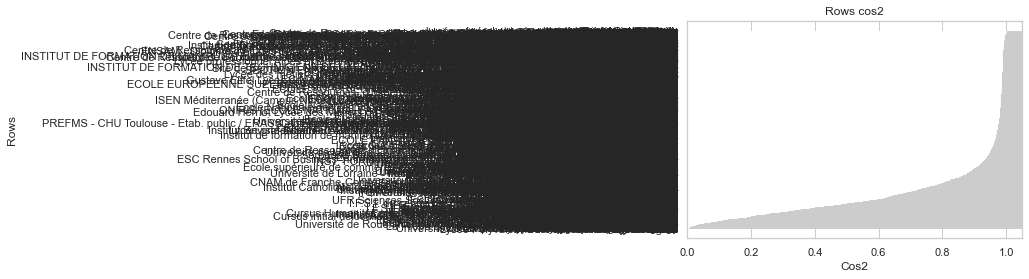

In [208]:
res_pca.plot_row_cos2(num_axis=1)

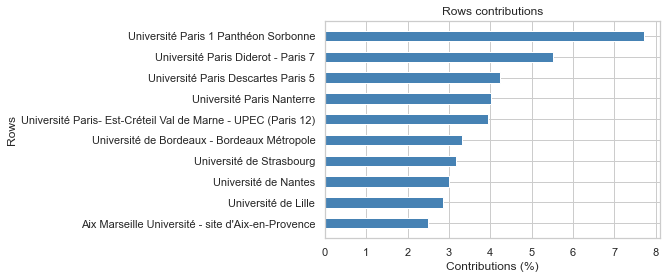

In [209]:
res_pca.plot_row_contrib(num_axis=1, nb_values=10)

#### les variables

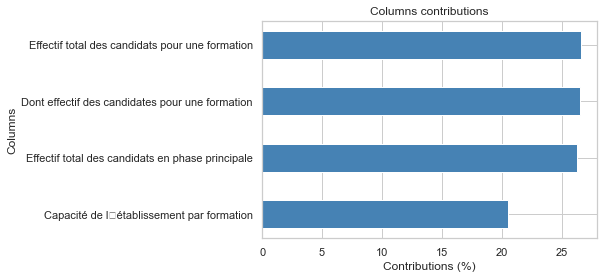

In [210]:
res_pca.plot_col_contrib(num_axis=1)

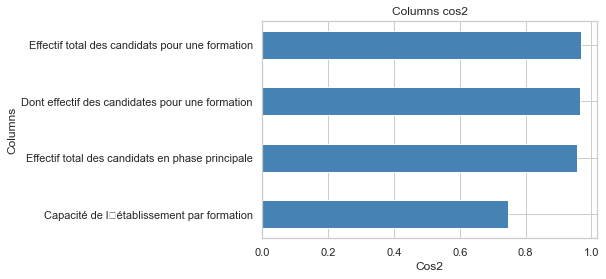

In [211]:
res_pca.plot_col_cos2(num_axis=1)

### ACP quanti 2018-2019 (méthode 2)

In [19]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from function_biplot import *
sns.set_theme(style="whitegrid")

In [20]:
# choix du nombre de composantes à calculer
n_comp =4 #(4variables quanti)

In [21]:
# préparation des données pour l'ACP
col=df.select_dtypes(['int64','float64','category']).columns.tolist()
df_resu= df[col].fillna(df[col].mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.select_dtypes(['int64','float64']).values
features = df_resu.select_dtypes(['int64','float64']).columns
names=df_resu.select_dtypes(['int64','float64']).index

In [22]:
#code couleur
colors = df_resu["Session"].astype('category')
y = colors.cat.codes

In [23]:
colors

Établissement
Université Grenoble Alpes - Antennes de Valence    2018
Universite Jean Monnet, Saint-Etienne              2018
Universite Jean Monnet, Saint-Etienne              2018
Universite Jean Monnet, Saint-Etienne              2018
Universite Jean Monnet, Saint-Etienne              2018
                                                   ... 
Lycée Marie Curie                                  2019
Lycée LEON BLUM                                    2019
Lycée professionnel Tristan Bernard                2019
Lycée Jean Monnet                                  2019
Lycée professionnel Thomas-Jean Main               2019
Name: Session, Length: 22274, dtype: category
Categories (2, int64): [2018, 2019]

In [24]:
X 

array([[  35.,  251.,  153.,  172.],
       [ 175., 1096.,  850., 1095.],
       [  30.,  143.,   99.,  103.],
       ...,
       [  20.,    0.,    0.,    0.],
       [  24.,    0.,    0.,    0.],
       [  24.,    0.,    0.,    0.]])

In [25]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)  #StandardScaler(with_std=False) pour centrer
X_scaled = std_scale.transform(X)

In [26]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

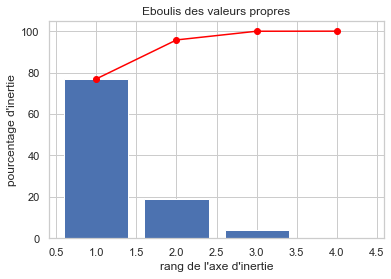

In [27]:
# Eboulis des valeurs propres
display_scree_plot(pca)

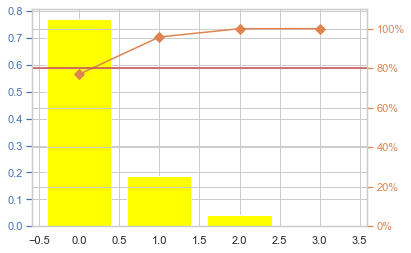

In [221]:
# Eboulis des valeurs propres amelioré
def pareto(data) :
    from matplotlib.ticker import PercentFormatter
    import numpy as np
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="yellow")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()
pareto(pca.explained_variance_ratio_)

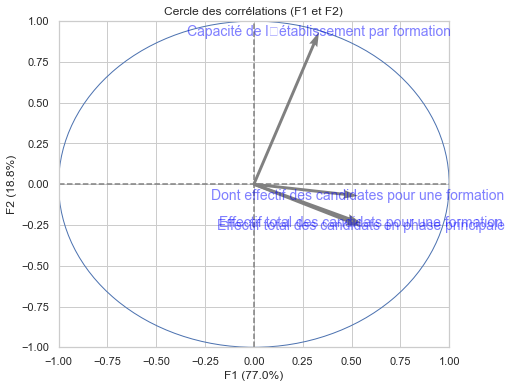

In [222]:
# Cercle des corrélations
pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

-**L'axe F1 explique 77% de l'information et l'axe F2 18% donc 95,8‰ de l'information**

-**Groupe d'établissements lient à la capacité**

-**Groupe d'établissements lient effectif total des candidats...**

In [28]:
res_pca=pca.fit_transform(X_scaled)

In [224]:
#biplot(score=res_pca[:,0:2],coeff=np.transpose(pca.components_[0:2, :]),cat=y,cmap="viridis")
#plt.show()

In [225]:
#coeff_labels
#score_labels
#biplot(score=res_pca[:,0:2],coeff=np.transpose(pca.components_[0:2, :]),cat=y,cmap="viridis")
#plt.show()

In [226]:
#biplot(score=data_sortie[:,0:2],coeff=np.transpose(mypca.components_[0:2, :]),cat=y, bigdata=100,coeff_labels = list(X.columns),density=False)
#plt.show()

In [227]:
#biplot(score=data_sortie[:,0:2],cat=y, bigdata=100,density=True)
#plt.show()

In [228]:
#plt.scatter(res_pca[:,0],res_pca[:,1],c=col, cmap='Set1')
#plt.show()

In [229]:
#labels = list(range(1,80,1))
#plt.scatter(res_pca[:,0],res_pca[:,1],c=col, cmap='Set1')
#plt.grid(color='white', linestyle='solid')
#plt.title("Scatter Plot", size=20)
#for i in range(len(labels)) :
    #plt.text(res_pca[i,0],res_pca[i,1],labels[i])
#plt.show()

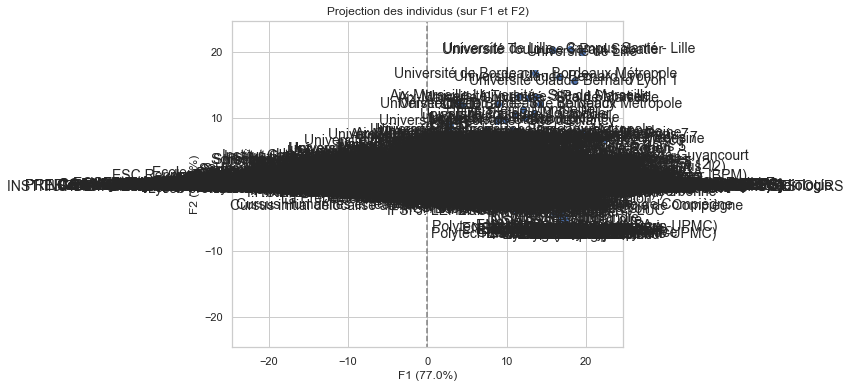

In [29]:
# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var =names, alpha = 0.5) #pour la classification
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.show()

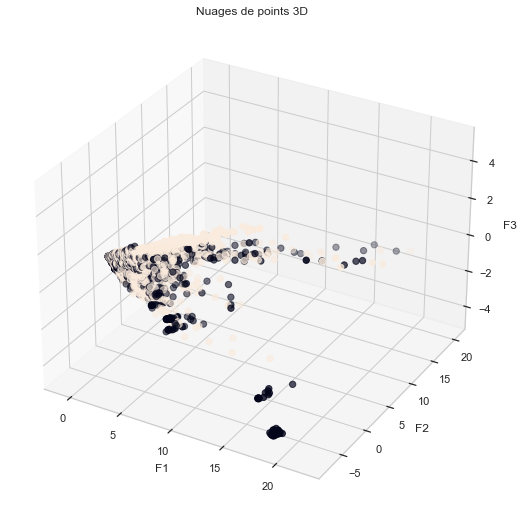

In [30]:
colors = {'2018':'red', '2019':'green'}
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,9))
ax = fig.gca(projection='3d')
ax.scatter(res_pca[:,0],res_pca[:,1],res_pca[:,2],zdir='z',s=40,depthshade=True,c=y)
# Paramétrer le graphique
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.title('Nuages de points 3D')
#plt.legend(loc=2)
plt.show()

###  tSME 2018-2019 (alternatif à ACP )

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(n_components=3)

In [33]:
X_embedded = tsne.fit_transform(X_scaled)

In [34]:
print(X_embedded.shape)

(22274, 3)


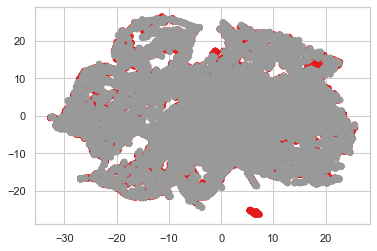

In [35]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y, cmap='Set1')
plt.show()

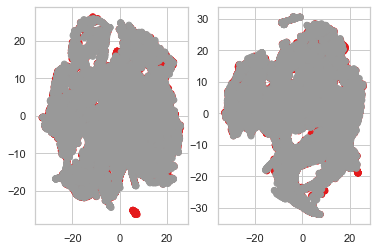

In [36]:
plt.subplot(121)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y, cmap='Set1') # c2 = f(c1)
plt.subplot(122)
plt.scatter(X_embedded[:,0],X_embedded[:,2],c=y, cmap='Set1') # c3 = f(c2)
plt.show()

### AFC quali 2018-2019

In [37]:
from fanalysis.ca import CA

In [40]:
# préparation des données pour l'ACP
#df_resu = df_resu.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = Tc.values
features = Tc.columns.values
names=Tc.index.values

In [41]:
res_ca = CA(row_labels=names, col_labels=features)

In [42]:
res_ca .fit(X)

CA(col_labels=array(['Année préparatoire', 'BPJEPS', 'BTS - Production',
       'BTS - Services', 'BTSA', 'Bachelor', 'CPES',
       'CUPGE - Arts Lettres Langues', 'CUPGE - Droit-économie-gestion',
       'CUPGE - Sciences humaines et sociales',
       'CUPGE - Sciences, technologie, santé', 'Cadre Technique',
       'Classe préparatoire aux études supérieures',
       'Classe préparatoire littéraire',
       'Classe préparatoire scienti...
       'Titre professionnel'], dtype=object),
   row_labels=array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Etranger', 'Grand Est',
       'Guadeloupe', 'Guyane', 'Hauts-de-France', 'Ile-de-France',
       'La Réunion', 'Martinique', 'Mayotte', 'Normandie',
       'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
       'Polynésie française', "Provence Alpes Côte d'Azur"], dtype=object))

In [43]:
#Analyse des valeurs propres
print("les valeurs propres en valeur absolue ", res_ca .eig_[0] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage de la variance totale ", res_ca .eig_[1] )
print(" ")
print("-----------------------------------------------------")
print(" ")
print("les valeurs propres en pourcentage cumulé de la variance totale ", res_ca .eig_[2] )

les valeurs propres en valeur absolue  [0.0459278  0.01524978 0.01471392 0.0135101  0.00991952 0.00806805
 0.0076067  0.0068225  0.00596314 0.00578815 0.00476965 0.00301673
 0.00242342 0.00222702 0.00208182 0.001692   0.00115477 0.00072049
 0.00061812]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage de la variance totale  [30.16135648 10.01472018  9.66281031  8.87224733  6.51426882  5.2983871
  4.99541645  4.48041787  3.91606934  3.80114714  3.13228888  1.98112382
  1.59148809  1.46250911  1.36715931  1.11115837  0.75835114  0.47315352
  0.40592673]
 
-----------------------------------------------------
 
les valeurs propres en pourcentage cumulé de la variance totale  [ 30.16135648  40.17607666  49.83888697  58.7111343   65.22540312
  70.52379023  75.51920668  79.99962454  83.91569388  87.71684103
  90.84912991  92.83025373  94.42174182  95.88425093  97.25141024
  98.36256861  99.12091975  99.59407327 100.        ]


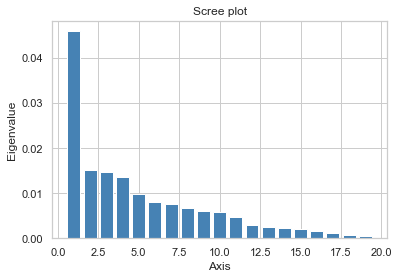

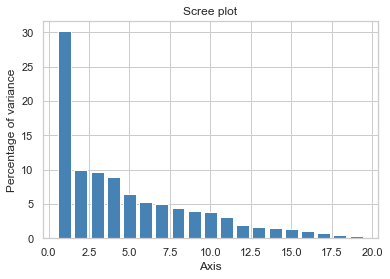

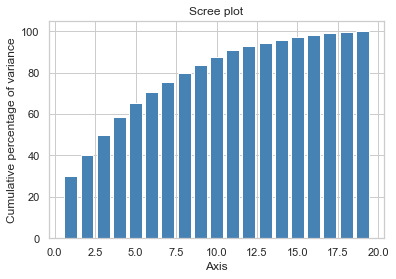

In [44]:
res_ca.plot_eigenvalues()
res_ca .plot_eigenvalues(type="percentage")
res_ca .plot_eigenvalues(type="cumulative")

In [45]:
#Extraction des statistiques sur les points lignes
df_rows = res_ca.row_topandas()
print(df_rows)

                            row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Auvergne-Rhône-Alpes              0.029371        0.022570       -0.012970   
Bourgogne-Franche-Comté           0.150700       -0.167448       -0.073268   
Bretagne                          0.086080       -0.048363       -0.042614   
Centre-Val de Loire               0.182265        0.066851        0.104061   
Corse                             0.003916       -0.239072        0.147346   
Etranger                         -0.827638        1.335478       -1.773034   
Grand Est                         0.055942       -0.071635        0.052244   
Guadeloupe                        0.174290        0.090130        0.328049   
Guyane                            0.182316       -0.067588        0.286113   
Hauts-de-France                   0.058467        0.034592        0.048632   
Ile-de-France                    -0.428203        0.017363       -0.006519   
La Réunion                        0.178445        0.101247      

In [46]:
###Statistiques pour les points lignes
# Coordonnées des points lignes
print(res_ca.row_coord_)

[[ 2.93714820e-02  2.25698666e-02 -1.29702354e-02  1.09089116e-01
  -2.22268457e-01  2.80164210e-03 -8.72359039e-04  5.27091677e-02
  -8.57074334e-03  2.36560244e-02 -3.95865222e-02  1.43238325e-02
   1.79649109e-02 -1.27211914e-03 -6.21908681e-03 -4.57453806e-03
   1.78260283e-02  8.99073878e-03 -3.83915062e-03]
 [ 1.50700241e-01 -1.67447937e-01 -7.32677624e-02  1.37524140e-01
   1.35735861e-01 -1.62672823e-02  5.66765242e-02  1.30551480e-01
  -1.04933702e-01  1.42429103e-01  6.58300415e-02 -3.04968525e-02
  -6.45589367e-02 -4.61128578e-02  5.79640128e-04  4.47342611e-02
  -4.97719183e-03  3.89333283e-02 -2.34354965e-02]
 [ 8.60801096e-02 -4.83631119e-02 -4.26143038e-02  6.56647719e-02
  -4.95001112e-02 -6.82802091e-03  9.81897178e-02 -1.66837884e-01
   8.07755780e-02 -9.35825219e-03  5.26659406e-02 -1.30440799e-01
   5.01268208e-02  3.04518723e-02  3.40901705e-04  5.83070071e-02
  -2.67310902e-02  3.71567578e-03 -3.81839523e-03]
 [ 1.82265190e-01  6.68505305e-02  1.04060684e-01 -6.71

In [47]:
# Contributions des points lignes
print(res_ca.row_contrib_)

[[2.23219312e-01 3.96963047e-01 1.35869875e-01 1.04679133e+01
  5.91862613e+01 1.15614562e-02 1.18891210e-03 4.83932414e+00
  1.46392060e-01 1.14894636e+00 3.90448541e+00 8.08235206e-01
  1.58262367e+00 8.63550834e-03 2.20782695e-01 1.46977022e-01
  3.27016567e+00 1.33327458e+00 2.83369799e-01]
 [2.11788498e+00 7.87491965e+00 1.56259975e+00 5.99583376e+00
  7.95515919e+00 1.40479085e-01 1.80867304e+00 1.06996711e+01
  7.90869742e+00 1.50109488e+01 3.89145307e+00 1.32045549e+00
  7.36605052e+00 4.08950595e+00 6.91230849e-04 5.06558868e+00
  9.18805874e-02 9.01086197e+00 3.80562517e+00]
 [8.57597346e-01 8.15301669e-01 6.56048606e-01 1.69652364e+00
  1.31303212e+00 3.07167084e-02 6.73734831e+00 2.16870010e+01
  5.81618821e+00 8.04272988e-02 3.09119610e+00 2.99808512e+01
  5.51144662e+00 2.21339077e+00 2.96734401e-04 1.06805646e+01
  3.28921056e+00 1.01859661e-01 1.25384190e-01]
 [2.52646430e+00 1.02359338e+00 2.57055243e+00 1.16662183e+00
  2.70815337e+00 1.37449437e+00 1.10801105e+01 1.0

In [48]:
# Cos2 des points lignes
print(res_ca.row_cos2_)

[[1.25329070e-02 7.40044920e-03 2.44396967e-03 1.72887239e-01
  7.17721185e-01 1.14031649e-04 1.10558115e-05 4.03619755e-02
  1.06717852e-03 8.12987029e-03 2.27664227e-02 2.98070205e-03
  4.68867607e-03 2.35101646e-05 5.61892628e-04 3.04014703e-04
  4.61646216e-03 1.17433189e-03 2.14126490e-04]
 [1.41128190e-01 1.74239044e-01 3.33589010e-02 1.17528651e-01
  1.14491984e-01 1.64443187e-03 1.99614596e-02 1.05913050e-01
  6.84251666e-02 1.26061757e-01 2.69298625e-02 5.77957517e-03
  2.58999315e-02 1.32138677e-02 2.08786669e-06 1.24355906e-02
  1.53941118e-04 9.41952367e-03 3.41298355e-03]
 [8.24838634e-02 2.60370542e-02 2.02150196e-02 4.79985648e-02
  2.72756885e-02 5.18982910e-04 1.07323641e-01 3.09850867e-01
  7.26312504e-02 9.74883817e-04 3.08761443e-02 1.89404492e-01
  2.79707231e-02 1.03226540e-02 1.29366467e-06 3.78446830e-02
  7.95420383e-03 1.53687659e-04 1.62302470e-04]
 [1.86201345e-01 2.50486927e-02 6.06944106e-02 2.52919619e-02
  4.31079837e-02 1.77953047e-02 1.35249158e-01 1.1

In [49]:
#Extraction des statistiques sur les points colonnes
df_cols = res_ca.col_topandas()
print(df_cols)

                                                    col_coord_dim1  \
Année préparatoire                                        0.223344   
BPJEPS                                                    0.226054   
BTS - Production                                          0.135785   
BTS - Services                                            0.052540   
BTSA                                                      0.426214   
Bachelor                                                 -0.601648   
CPES                                                     -1.998076   
CUPGE - Arts Lettres Langues                              0.261036   
CUPGE - Droit-économie-gestion                            0.380645   
CUPGE - Sciences humaines et sociales                     1.179305   
CUPGE - Sciences, technologie, santé                     -0.010245   
Cadre Technique                                           1.179305   
Classe préparatoire aux études supérieures                0.005734   
Classe préparatoire 

In [50]:
##Statistiques pour les points colonnes
# Coordonnées des points colonnes
print(res_ca.col_coord_)

[[ 2.23344131e-01  3.20247643e-02 -1.97814871e-01 -1.85357188e-01
   2.72727910e-01 -1.29462655e-01  4.80750368e-01  3.92997315e-02
   2.90696804e-01  8.28848416e-03  2.30211147e-01 -7.39221600e-03
   3.83026794e-01  1.59175494e-01  1.44777463e-01 -1.83082993e-01
   2.22324436e-02 -3.83654905e-02 -2.94128882e-02]
 [ 2.26054223e-01 -1.83189404e-01  3.10817270e-03 -1.55440097e-01
   5.08139054e-02  6.32252844e-02  8.94991412e-02  1.77119320e-01
   2.35204383e-01  6.86445627e-02 -1.35924864e-01  4.73932116e-02
   1.02328344e-03 -1.48163502e-01  1.03437686e-01  1.60177807e-01
  -4.31292342e-03 -7.54629157e-03  1.05372680e-01]
 [ 1.35785347e-01 -1.65118612e-03  4.50664624e-02  2.32517418e-02
   5.00996905e-02  2.32839374e-02  1.08683569e-02  3.09582409e-02
   4.20271878e-02  4.42664986e-02  8.97714826e-03  1.65449451e-02
   1.08060696e-02  2.50256305e-02 -1.98878397e-02  8.20089510e-03
   3.59804296e-03 -6.67565991e-03 -7.44514132e-03]
 [ 5.25395784e-02  4.10233071e-02  6.31446875e-02 -7.33

In [51]:
# Contributions des points colonnes
print(res_ca.col_contrib_)

[[3.07196131e-01 1.90217552e-02 7.52197602e-01 7.19287888e-01
  2.12085518e+00 5.87574389e-01 8.59379665e+00 6.40292137e-02
  4.00818411e+00 3.35701332e-03 3.14273969e+00 5.12336385e-03
  1.71227076e+01 3.21789120e+00 2.84773992e+00 5.60321862e+00
  1.21065828e-01 5.77825839e-01 3.95863274e-01]
 [7.09315904e-01 1.40290156e+00 4.18573903e-04 1.14013898e+00
  1.65945237e-01 3.15866244e-01 6.71322733e-01 2.93142422e+00
  5.91433291e+00 5.18994698e-01 2.46945617e+00 4.74663653e-01
  2.75457003e-04 6.28418850e+00 3.27645182e+00 9.66705168e+00
  1.02692439e-02 5.03883810e-02 1.14517990e+01]
 [6.36399216e+00 2.83418327e-03 2.18815546e+00 6.34383725e-01
  4.01124418e+00 1.06523114e+00 2.46167535e-01 2.22694106e+00
  4.69553388e+00 5.36673748e+00 2.67848783e-01 1.43844657e+00
  7.63847774e-01 4.45806263e+00 3.01183231e+00 6.30117065e-01
  1.77720299e-01 9.80530310e-01 1.42158531e+00]
 [1.53212662e+00 2.81316288e+00 6.90784436e+00 1.01439157e+01
  2.53047537e-02 5.05092635e-02 5.34603655e-01 1.5

In [52]:
# Cos2 des points colonnes
print(res_ca.col_cos2_)

[[6.11917256e-02 1.25810097e-03 4.80022383e-02 4.21465933e-02
  9.12436774e-02 2.05604508e-02 2.83519453e-01 1.89462288e-03
  1.03663084e-01 8.42740442e-05 6.50124165e-02 6.70336564e-05
  1.79970748e-01 3.10810746e-02 2.57125729e-02 4.11187231e-02
  6.06342500e-04 1.80561487e-03 1.06125306e-03]
 [1.67523679e-01 1.10014936e-01 3.16709605e-05 7.92094629e-02
  8.46478829e-03 1.31048645e-02 2.62596351e-02 1.02844916e-01
  1.81360111e-01 1.54476790e-02 6.05687716e-02 7.36348202e-03
  3.43275528e-06 7.19670032e-02 3.50758773e-02 8.41115501e-02
  6.09809865e-05 1.86688735e-04 3.64004713e-02]
 [6.03730046e-01 8.92748303e-05 6.65034095e-02 1.77030443e-02
  8.21877441e-02 1.77521035e-02 3.86780669e-03 3.13826437e-02
  5.78359183e-02 6.41633924e-02 2.63884433e-03 8.96329392e-03
  3.82360036e-03 2.05072313e-02 1.29512652e-02 2.20221384e-03
  4.23906097e-04 1.45923548e-03 1.81502606e-03]
 [1.73870911e-01 1.06002254e-01 2.51146656e-01 3.38626289e-01
  6.20224893e-04 1.00692268e-03 1.00481249e-02 2.6

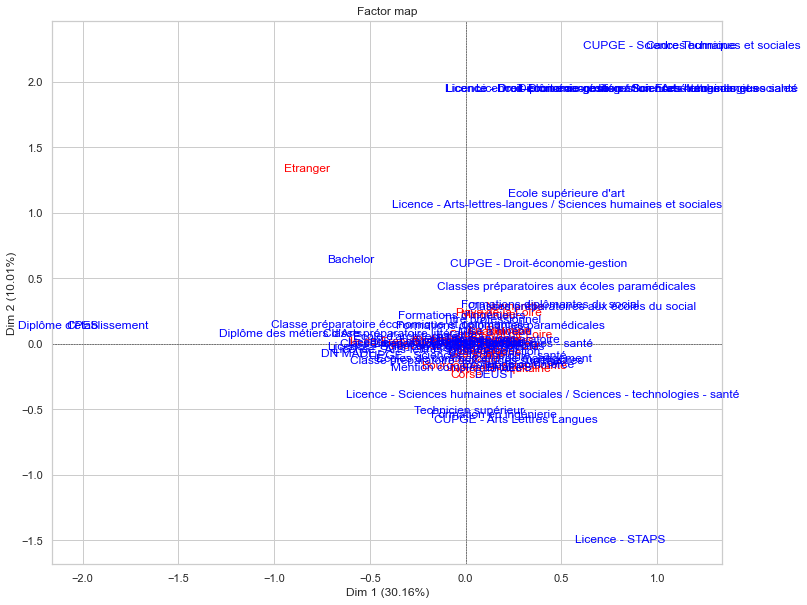

In [53]:
##Graphiques
#Graphiques factoriels
# Mapping simultané des points lignes et colonnes
res_ca.mapping(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

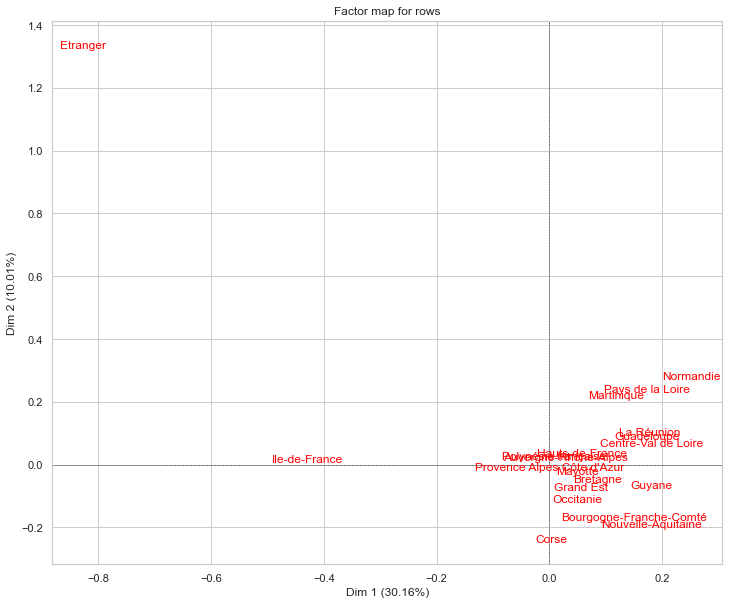

In [54]:
# Mapping des points lignes
res_ca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

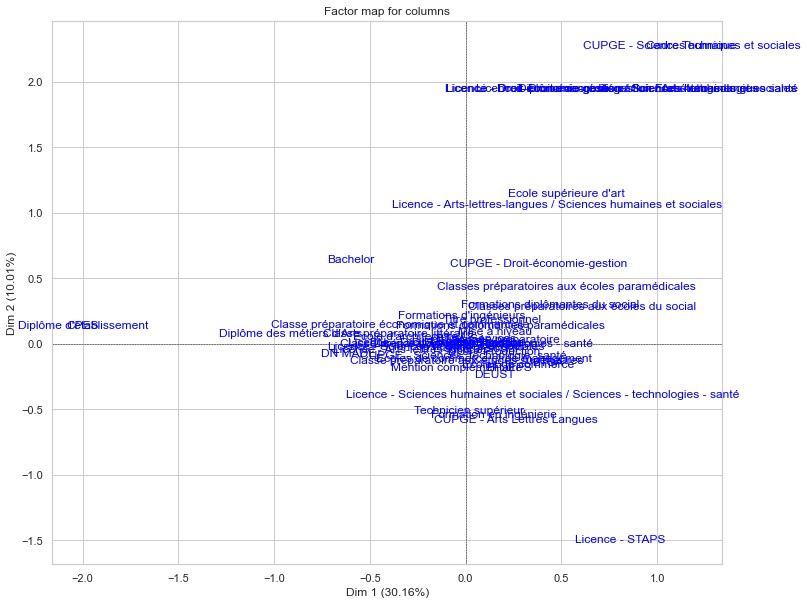

In [55]:
# Mapping des points colonnes
res_ca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(12, 10))

#### les lignes

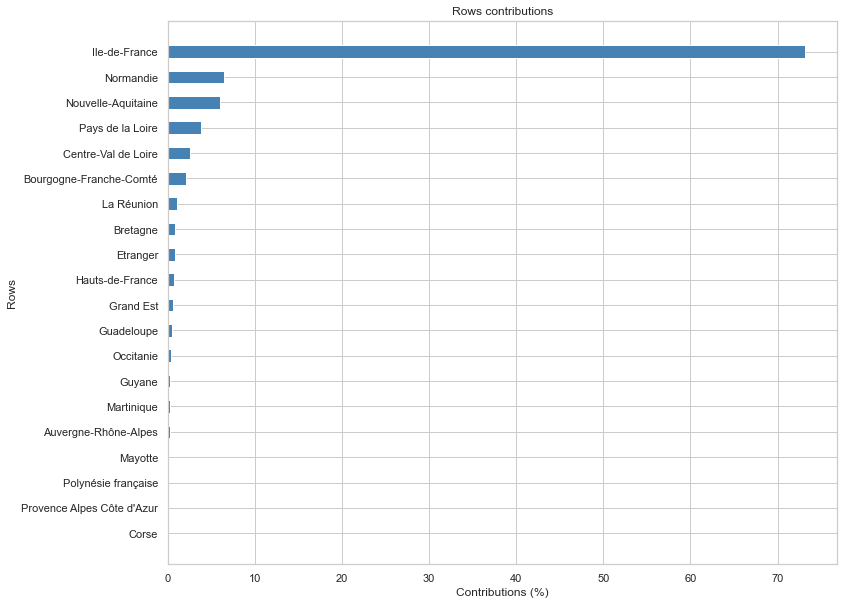

In [56]:
#Analyse du 1er axe - Points lignes
#Classement des points lignes en fonction de leur contribution au 1er axe
res_ca.plot_row_contrib(num_axis=1,figsize=(12, 10))

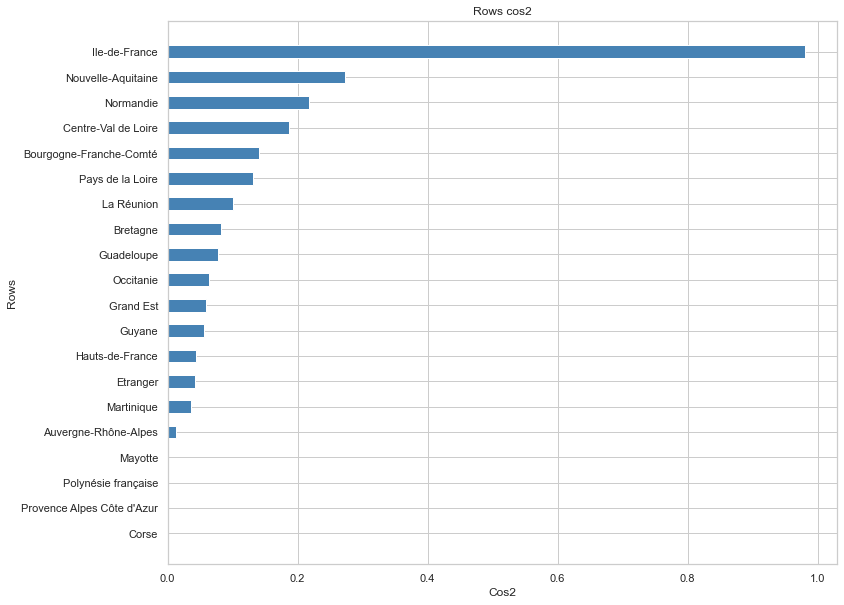

In [57]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
res_ca.plot_row_cos2(num_axis=1,figsize=(12, 10))

#### les colonnes

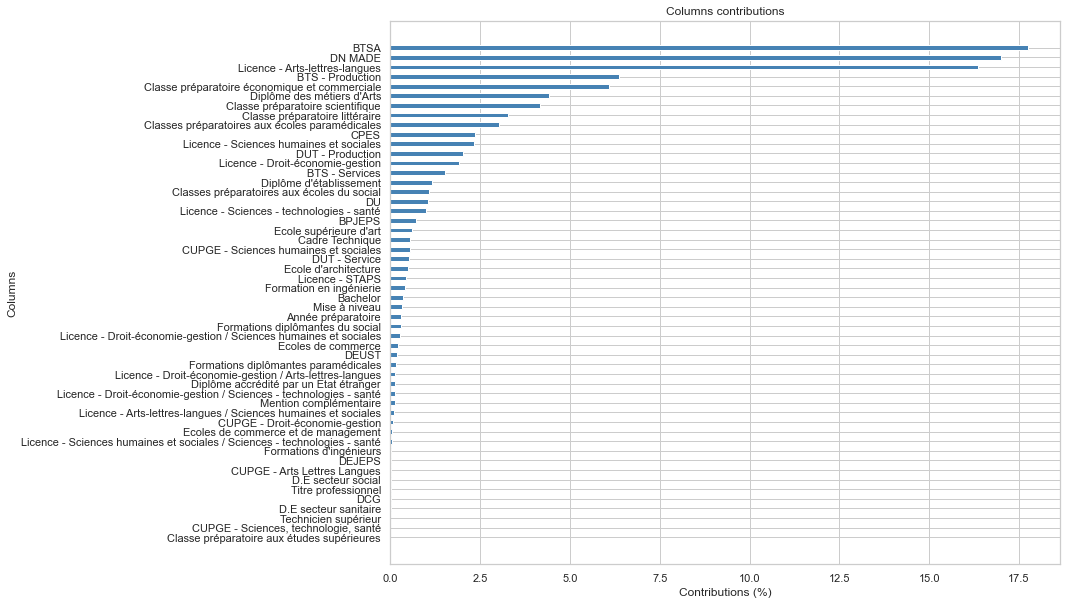

In [58]:
#Analyse du 1er axe - Points colonnes
# Classement des points colonnes en fonction de leur contribution au 1er axe
res_ca.plot_col_contrib(num_axis=1,figsize=(12, 10))

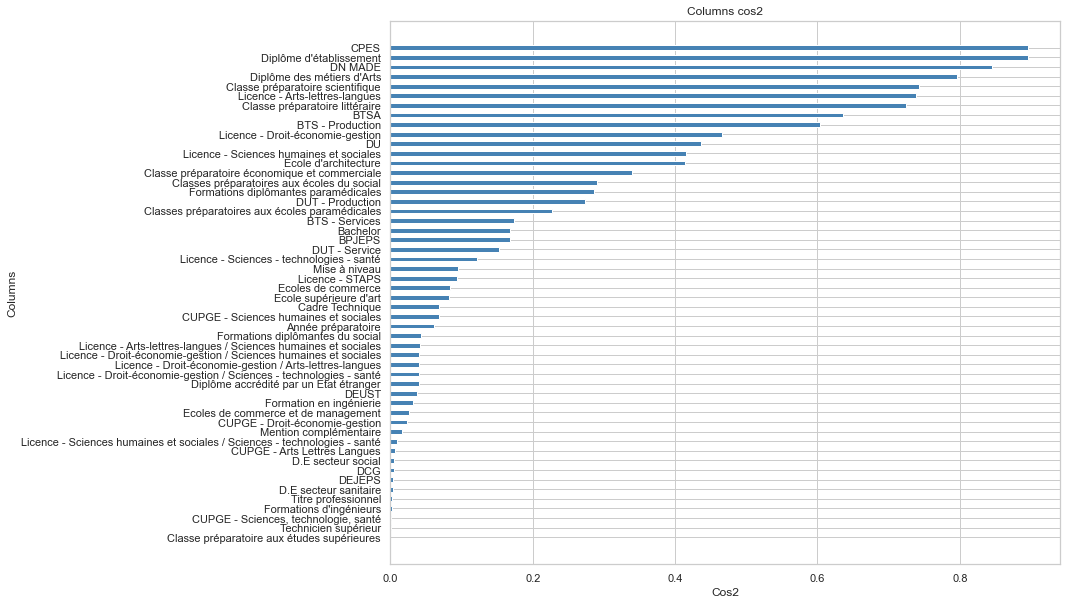

In [59]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
res_ca.plot_col_cos2(num_axis=1,figsize=(12, 10))

# Machine Leaning 2018-2019

### Regression quanti   2018-2019

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import metrics
from fanalysis.pca import PCA

In [83]:
#df_resu.tail(5)
df.select_dtypes(['int64','float64']).tail(5)

Capacité de létablissement par formation  \
Établissement                                                                     
Lycée Marie Curie                                                          20.0   
Lycée LEON BLUM                                                            25.0   
Lycée professionnel Tristan Bernard                                        20.0   
Lycée Jean Monnet                                                          24.0   
Lycée professionnel Thomas-Jean Main                                       24.0   

                                      Effectif total des candidats pour une formation  \
Établissement                                                                           
Lycée Marie Curie                                                                   0   
Lycée LEON BLUM                                                                     0   
Lycée professionnel Tristan Bernard                                                 0   
Lycée Jean Monnet                                                                   0   
Lycée professionnel Thomas-Jean Main                                                0   

                                      Dont effectif des candidates pour une formation  \
Établissement                                                                           
Lycée Marie Curie                                                                   0   
Lycée LEON BLUM                                                                     0   
Lycée professionnel Tristan Bernard                                                 0   
Lycée Jean Monnet                                                                   0   
Lycée professionnel Thomas-Jean Main                                                0   

                                      Effectif total des candidats en phase principale  
Établissement                                                                           
Lycée Marie Curie                                                                    0  
Lycée LEON BLUM                                                                      0  
Lycée professionnel Tristan Bernard                                                  0  
Lycée Jean Monnet                                                                    0  
Lycée professionnel Thomas-Jean Main                                                 0

In [75]:
# les NAN pas moyenne
df_resu= df.select_dtypes(['int64','float64']).fillna(df.select_dtypes(['int64','float64']).mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = df_resu.values[:,1:4]
target=df_resu.values[:,0]
features = df_resu.columns
names=df_resu.index

In [76]:
target #la variale à expliquer : capacité

array([ 35., 175.,  30., ...,  20.,  24.,  24.])

In [77]:
X #les variables explicatives

array([[ 251.,  153.,  172.],
       [1096.,  850., 1095.],
       [ 143.,   99.,  103.],
       ...,
       [   0.,    0.,    0.],
       [   0.,    0.,    0.],
       [   0.,    0.,    0.]])

In [78]:
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target,test_size=0.3,random_state=0) 

In [79]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

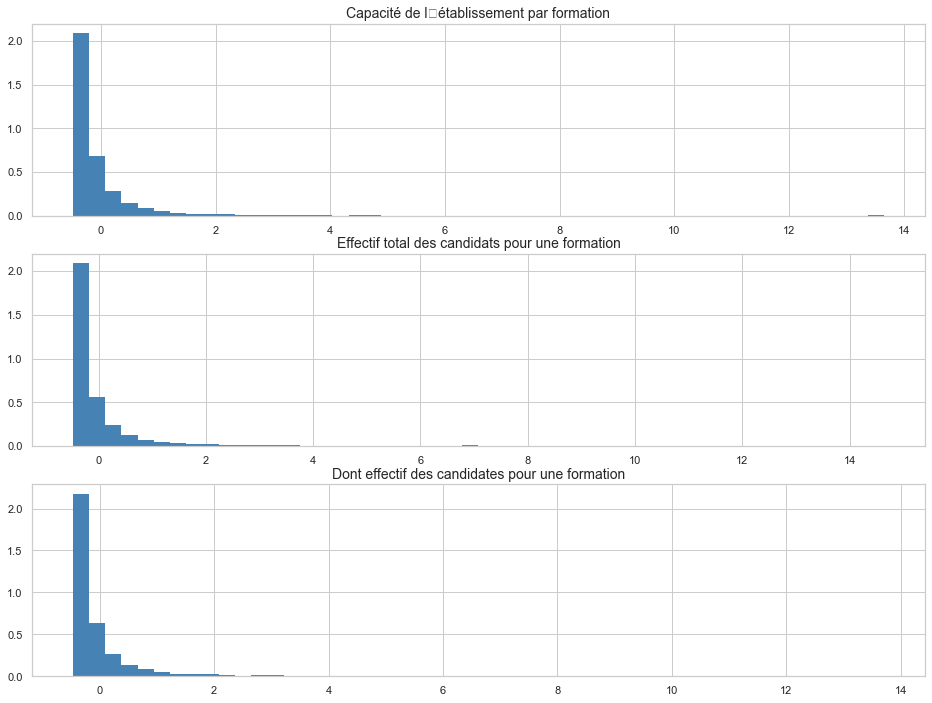

In [80]:
fig = plt.figure(figsize=(16, 12))
for col in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,1, (col+1))
    h = ax.hist(X_train_std[:, col], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(features[col], fontsize=14)

In [81]:
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [82]:
model =LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.23662795240383994

## Comparaison

In [84]:
# une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

# sans transformation des données
model =LinearRegression()

In [85]:
dictionnaire_modele = {'PCA_Regression' : pipe,  'regression':model }

In [86]:
def evaluation(model):
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print(' ')
    y_pred= model.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    print('SCORE:',model.score(X_test, y_test))
    print(' ')
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print(' ')
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print(' ')
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("\n")
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

PCA_Regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.23662795240384005
 
MAE: 44.212395609775534
 
MSE: 11738.60830545829
 
RMSE: 108.3448582326743




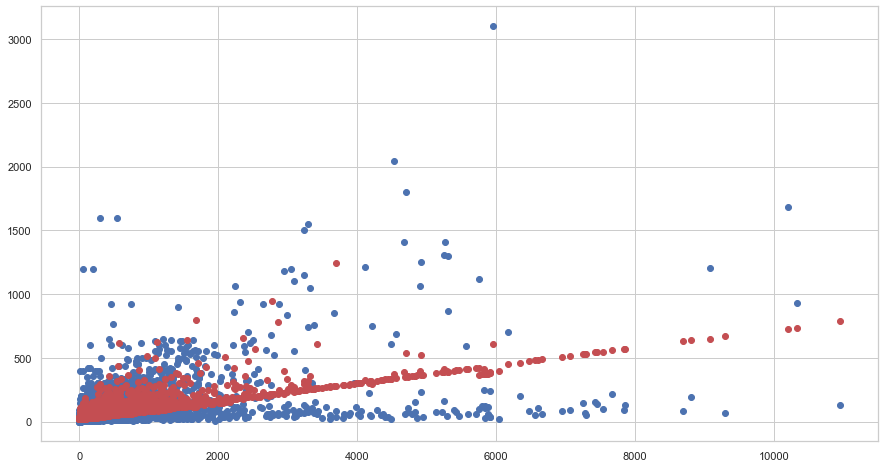

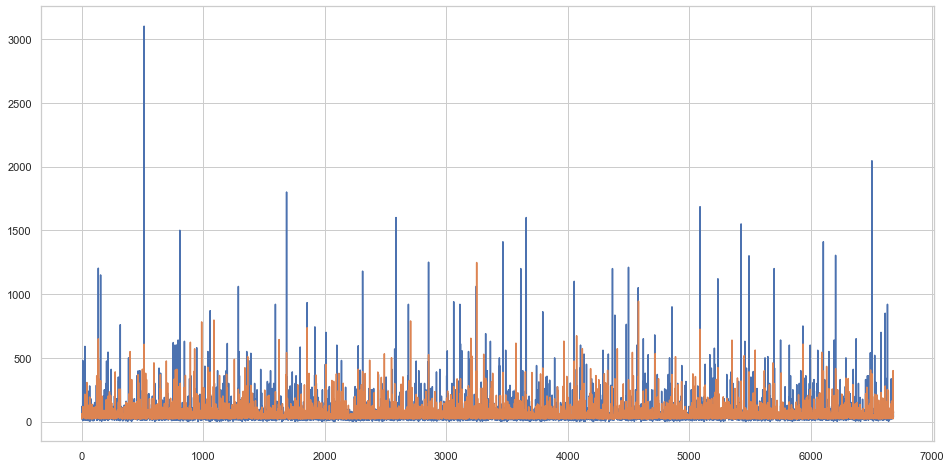

regression
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
SCORE: 0.23662795240383994
 
MAE: 44.21239560977549
 
MSE: 11738.608305458292
 
RMSE: 108.3448582326743




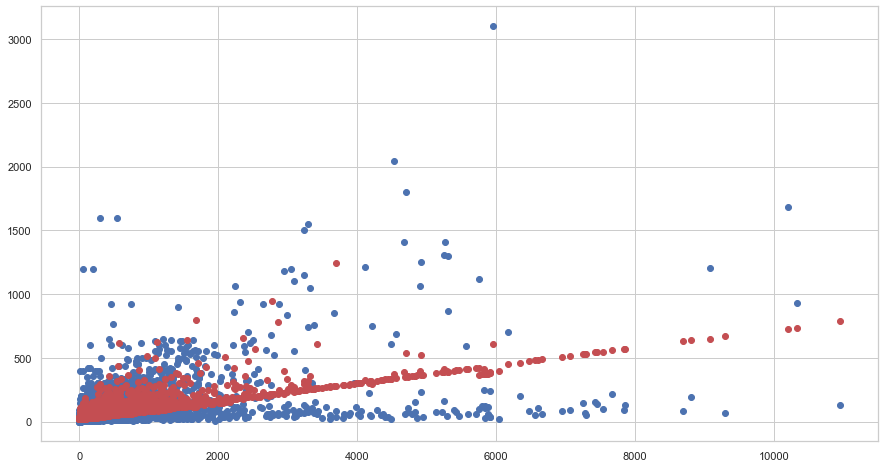

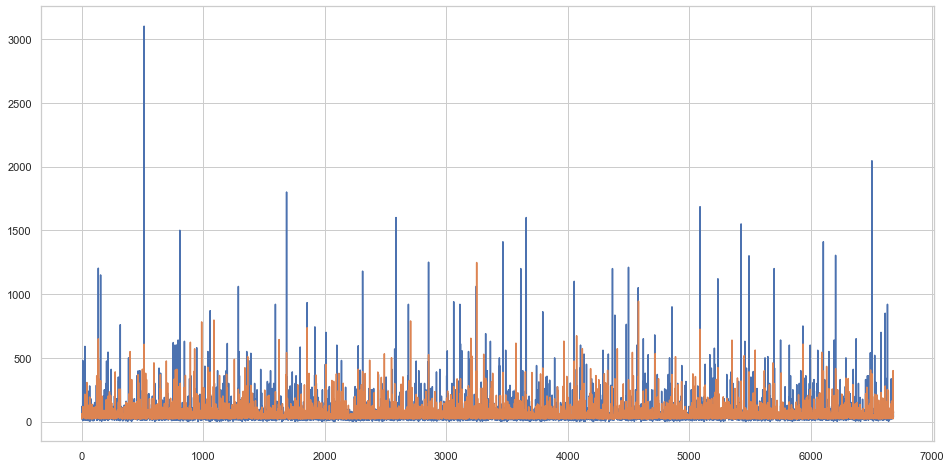

In [87]:
for name, model in dictionnaire_modele.items():
    print(name)
    evaluation(model) 

### Optimisation du modèle 

In [99]:
param = [{"pca__n_components": [x + 1 for x in range(5)]}];param

[{'pca__n_components': [1, 2, 3, 4, 5]}]

In [100]:
pipe = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [101]:
grid_search = GridSearchCV(pipe, param_grid=param, scoring="neg_mean_squared_error")

In [102]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(stats=False)),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid=[{'pca__n_components': [1, 2, 3, 4, 5]}],
             scoring='neg_mean_squared_error')

In [103]:
print("score optimal : ",grid_search.best_score_)
print(" ")
print("RMSE optimal : ",np.sqrt(-grid_search.best_score_))
print(" ")
print("paramètre optimal : ",grid_search.best_params_)

score optimal :  -9771.212472786652
 
RMSE optimal :  98.84944346219989
 
paramètre optimal :  {'pca__n_components': 3}


In [104]:
grid_search.predict(X_test).reshape(-1,1)

array([[61.42015328],
       [23.20534509],
       [56.61900915],
       ...,
       [24.76402632],
       [85.99655592],
       [68.5652776 ]])

In [105]:
def graph():
    grid_search.fit(X_train, y_train)
    grid_search.score(X_test, y_test)
    y_pred= grid_search.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],y_pred,c='r')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(y_test,label ='Test')
    plt.plot(y_pred, label = 'predict')
    plt.show()

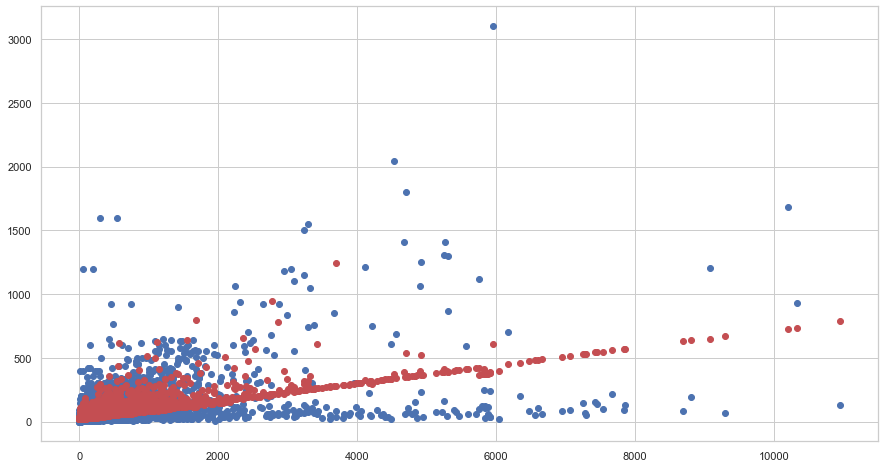

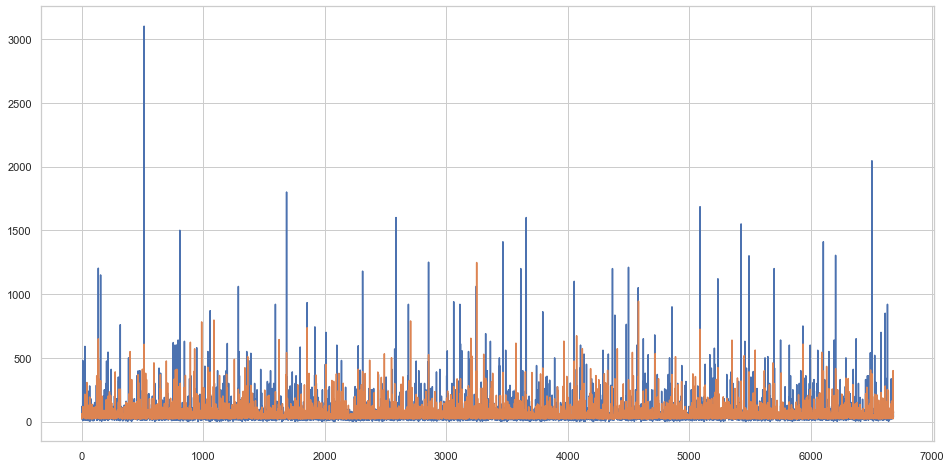

In [95]:
graph()

### Classification hierrachique 2018-2019
-**regrouper les individus selon leurs similarités**

In [106]:
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
#from sklearn import preprocessing

In [111]:
#Les individus uniques par sum
df_res=df.groupby(['Établissement','Session']).sum()
df_res.sample(5).reset_index()

Établissement Session  \
0                      Lycée Hugues Libergier    2018   
1  LP Lycée des Métiers Les 4 Cantons - Grieu    2019   
2                                Lycée Buffon    2018   
3                              Lycée Carcouet    2019   
4              Lycée professionnel Emile Zola    2019   

   Capacité de létablissement par formation  \
0                                      294.0   
1                                       12.0   
2                                       96.0   
3                                        NaN   
4                                       35.0   

   Effectif total des candidats pour une formation  \
0                                           4638.0   
1                                             39.0   
2                                           3701.0   
3                                              NaN   
4                                            119.0   

   Dont effectif des candidates pour une formation  \
0                                           3453.0   
1                                              4.0   
2                                           1106.0   
3                                              NaN   
4                                             18.0   

   Effectif total des candidats en phase principale  
0                                            4635.0  
1                                              31.0  
2                                            3678.0  
3                                               NaN  
4                                             117.0

In [112]:
df_res.columns

Index(['Capacité de létablissement par formation',
       'Effectif total des candidats pour une formation',
       'Dont effectif des candidates pour une formation',
       'Effectif total des candidats en phase principale'],
      dtype='object')

In [ ]:
##df_res.set_index('Établissement')

In [113]:
# préparation des données pour le clustering
df_res = df_res.fillna(df_res.mean())
X = df_res.values
features = df_res.columns
names=df_res.index.values

In [114]:
X

array([[  85.        , 9091.        , 2359.        , 9084.        ],
       [ 242.18094089, 2902.47733931, 1497.94330519, 2776.10804756],
       [ 242.18094089, 2902.47733931, 1497.94330519, 2776.10804756],
       ...,
       [  30.        ,   90.        ,   22.        ,   61.        ],
       [  70.        ,  282.        ,  170.        ,  137.        ],
       [  78.        ,  303.        ,  202.        ,  184.        ]])

In [115]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [116]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

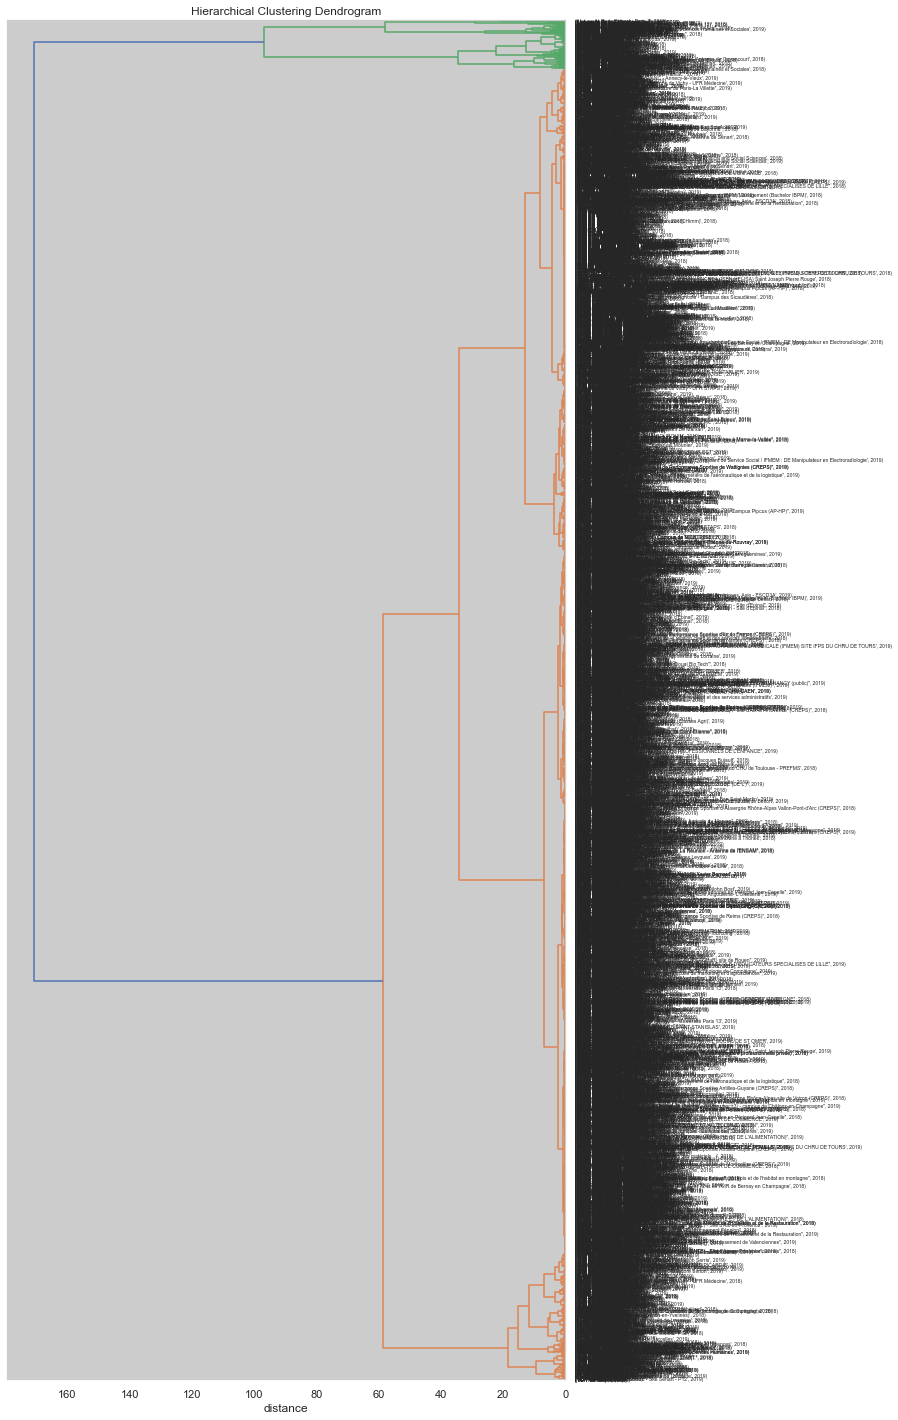

In [117]:
# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [124]:
# Coupage du dendrogramme en 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance')

In [125]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [126]:
id_clusters = np.argsort(clusters)

In [127]:
df_clust=pd.DataFrame(df_res.index[id_clusters],clusters[id_clusters])
df_clust.head(6)

0
1                                 (3IL, 2018)
1         (Lycée Polyvalent Rosa PARKS, 2019)
1         (Lycée Polyvalent Rosa PARKS, 2018)
1     (Lycée Polyvalent Robert GARNIER, 2019)
1     (Lycée Polyvalent Robert GARNIER, 2018)
1  (Lycée Polyvalent Pierre-Joël Bonté, 2019)

In [128]:
df_clust.sample(6)

0
1           (Lycée Camille Saint-Saens, 2019)
1        (Lycée Esthétique de Touraine, 2019)
1           (Lycée Modele Electronique, 2018)
1                  (Lycée Montalembert, 2018)
1   (Lycée professionnel Victor Lepine, 2018)
1  (Lycée Polyvalent les Bourdonnieres, 2019)

In [129]:
df_clust.tail(6)

0
3     (Université de Lorraine - Site de Nancy, 2018)
3  (Aix Marseille Université - site d'Aix-en-Prov...
3  (Aix Marseille Université - site d'Aix-en-Prov...
3     (Université de Lorraine - Site de Nancy, 2019)
3  (Université de Lille - Campus Pont de Bois - V...
3              (Université Jean Moulin Lyon 3, 2019)

### Clustering kmeans
-**regrouper les individus selon leurs similarités (inertie inter grande , inertie intra petite)**

In [130]:
from sklearn.cluster import KMeans
#from sklearn import decomposition

In [131]:
# Nombre de clusters souhaités
n_clust = 3

In [132]:
# Clustering par K-means
km = KMeans(n_clusters= n_clust)
km.fit(df_res)

KMeans(n_clusters=3)

In [133]:
# Récupération des clusters attribués à chaque individu
clusters_km = km.labels_

In [134]:
id_km = np.argsort(clusters_km)

In [135]:
#affichage des observations et leurs groupes
df_km=pd.DataFrame(df_res.index[id_km],clusters_km[id_km])
df_km.head(6)

0
0                                     (3IL, 2018)
0      (Lycée Polyvalent les Bourdonnieres, 2018)
0             (Lycée Polyvalent de Dembeni, 2019)
0             (Lycée Polyvalent de Dembeni, 2018)
0  (Lycée Polyvalent Touchard - Washington, 2019)
0  (Lycée Polyvalent Touchard - Washington, 2018)

In [136]:
df_km.sample(6)

0
0                                      (ISTOM, 2018)
0  (Institut consulaire de formation euro-méditer...
0                (La Rochelle Business School, 2019)
0                 (Lycée St Francois De Sales, 2018)
0                              (Lycée Fenelon, 2018)
0       (Lycée Saint Medard Inst N-D La Riche, 2018)

In [137]:
df_km.tail(6)

0
2  (Université Paris 13 - Antenne de Bobigny, 2018)
2                       (Université Paris 13, 2019)
2                       (Université Paris 13, 2018)
2                                 (INSA Lyon, 2018)
2                        (Université Paris 8, 2018)
2                  (EEIGM Nancy - Groupe INP, 2018)

In [138]:
#distances aux centres de classes des observations
km.transform(df_res)

array([[ 10294.3841871 ,  95156.74510447,  21179.09562082],
       [  1462.74139525, 103498.38392184,  29633.87963248],
       [  1462.74139525, 103498.38392184,  29633.87963248],
       ...,
       [  2721.46608649, 107674.76669127,  33816.78944731],
       [  2491.763663  , 107437.43134859,  33584.85245102],
       [  2435.43217079, 107380.58907333,  33528.77332268]])

In [139]:
#correspondance avec les groupes de la CAH
pandas.crosstab(clusters,clusters_km)

col_0     0   1    2
row_0               
1      6433   0   43
2        11   1  158
3         2  20   44

#### Correspondance CAH – K-Means
-**Le groupe 1 de la CAH coïncide avec le groupe 1 des K-Means. Après, il y a certes des correspondances, mais elles ne sont pas exactes.**

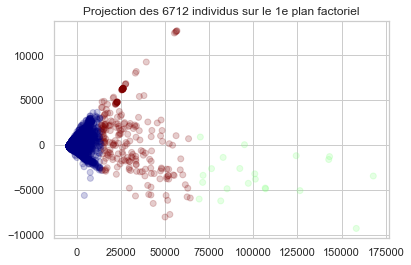

In [140]:
# Affichage du clustering par projection des individus sur le prmeier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_km.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

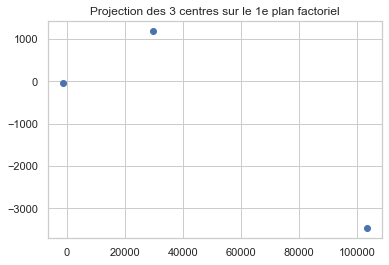

In [141]:
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

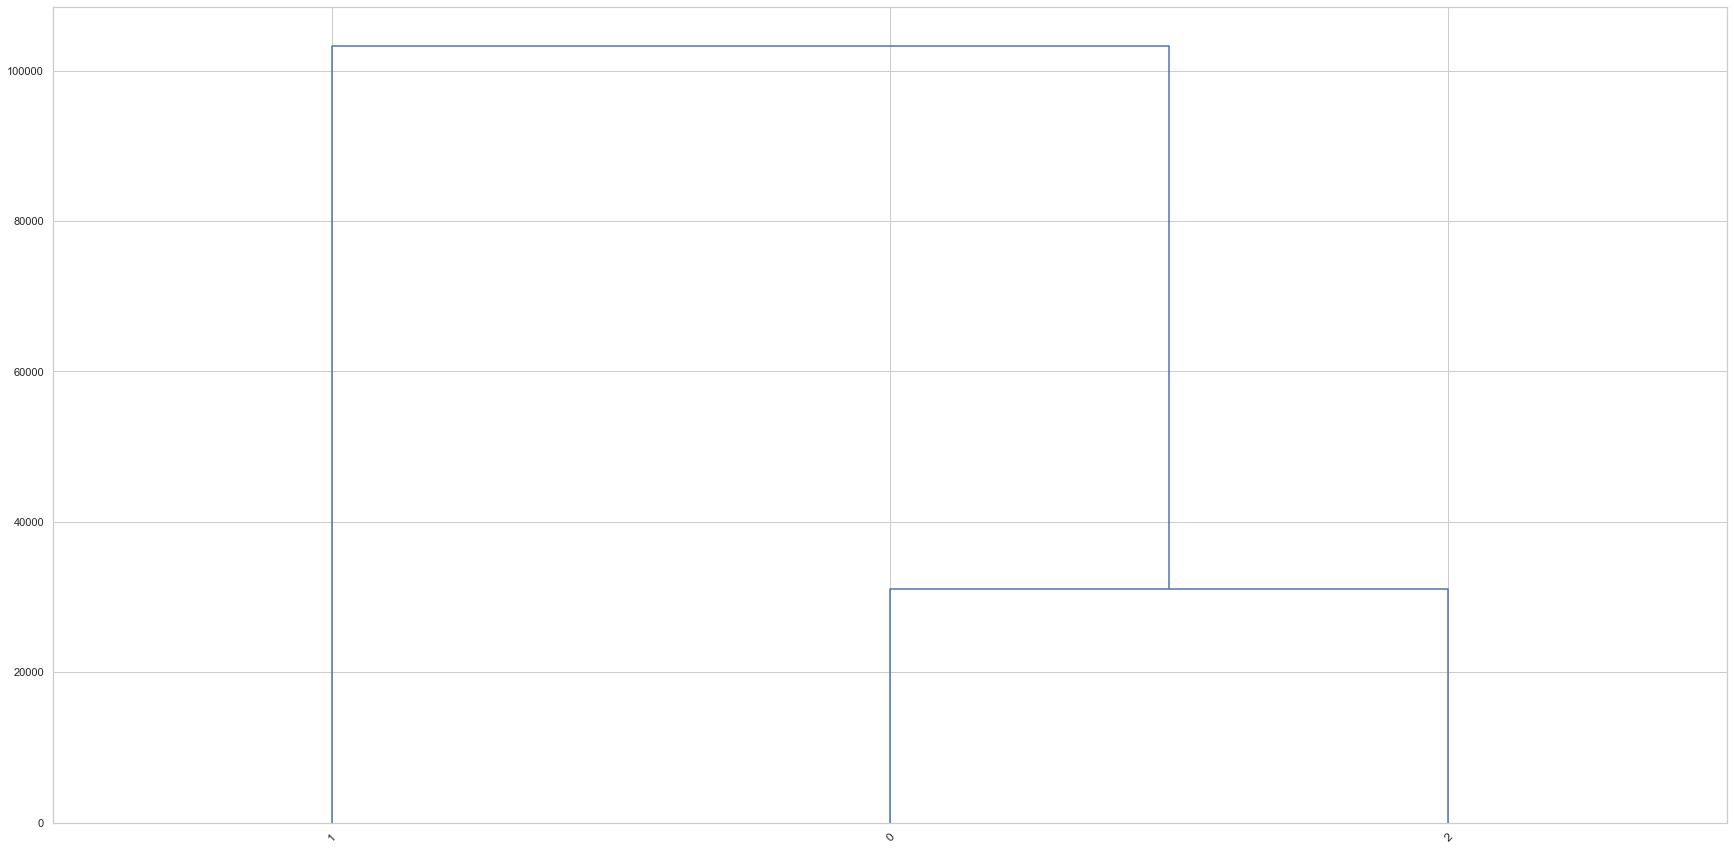

In [142]:
#Création d'un dendrogramme
plt.figure(figsize=(30,15))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 45., color_threshold = 2)
plt.show();

In [143]:
from sklearn import metrics

In [144]:
#utilisation de la métrique "silhouette"
# varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km =KMeans(n_clusters=k+2)
    km.fit(df_res)
    res[k] = metrics.silhouette_score(df_res,km.labels_)
    
print(res)


[0.8945989  0.86893924 0.72984484 0.70030567 0.67830065 0.67861257
 0.67688435 0.67590188 0.66588468]


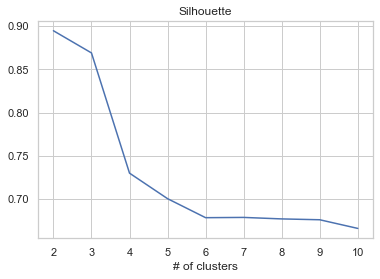

In [145]:
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

-**La partition en k = 2 groupes semble la meilleure au sens de la métrique « silhouette ».**

## Interprétation des classes

#### Statistiques comparatives

In [160]:
#moyenne par variable
print("moyenne par variable")
m = df_res.mean();m

moyenne par variable


Capacité de létablissement par formation            242.180941
Effectif total des candidats pour une formation     2902.477339
Dont effectif des candidates pour une formation     1497.943305
Effectif total des candidats en phase principale    2776.108048
dtype: float64

In [159]:
#TSS, variances
print("variances")
TSS = df_res.shape[0]*df_res.var(ddof=0); TSS

variances


Capacité de létablissement par formation           4.240343e+09
Effectif total des candidats pour une formation     2.606637e+11
Dont effectif des candidates pour une formation     8.625195e+10
Effectif total des candidats en phase principale    2.359854e+11
dtype: float64

In [158]:
#df conditionnellement aux groupes
gb = df_res.groupby(clusters_km); print(gb)
print("  ")

#effectifs conditionnels
print("effectifs conditionnels")
nk = gb.size(); print(nk)


  
effectifs conditionnels
0    6446
1      21
2     245
dtype: int64


In [166]:
#moyennes conditionnelles
print("moyennes conditionnelles")
print(" ")
mk = gb.mean()
print(mk)


moyennes conditionnelles
 
   Capacité de létablissement par formation  \
0                                 146.747359   
1                                7045.904762   
2                                2169.881633   

   Effectif total des candidats pour une formation  \
0                                      1913.893717   
1                                     71475.285714   
2                                     23034.644898   

   Dont effectif des candidates pour une formation  \
0                                       983.031409   
1                                     43574.238095   
2                                     11438.840816   

   Effectif total des candidats en phase principale  
0                                       1833.731805  
1                                      67529.333333  
2                                      22019.942857  


In [165]:
#pour chaque groupe écart à la moyenne par variable
print("écart à la moyenne par variable")
print(" ")
EMk= (mk-m)**2
print(EMk)

écart à la moyenne par variable
 
   Capacité de létablissement par formation  \
0                               9.107569e+03   
1                               4.629066e+07   
2                               3.716030e+06   

   Effectif total des candidats pour une formation  \
0                                     9.772976e+05   
1                                     4.702230e+09   
2                                     4.053042e+08   

   Dont effectif des candidates pour une formation  \
0                                     2.651343e+05   
1                                     1.770415e+09   
2                                     9.882144e+07   

   Effectif total des candidats en phase principale  
0                                      8.880730e+05  
1                                      4.192980e+09  
2                                      3.703252e+08  


In [167]:
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

Capacité de létablissement par formation           1.941239e+09
Effectif total des candidats pour une formation     2.043460e+11
Dont effectif des candidates pour une formation     6.309902e+10
Effectif total des candidats en phase principale    1.845068e+11
dtype: float64


In [170]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print("Rapport de corrélation")
print(" ")
print(R2)

Rapport de corrélation
 
Capacité de létablissement par formation           0.457802
Effectif total des candidats pour une formation     0.783945
Dont effectif des candidates pour une formation     0.731566
Effectif total des candidats en phase principale    0.781857
dtype: float64


#### Analyse en composantes principales (ACP) avec 2 axes

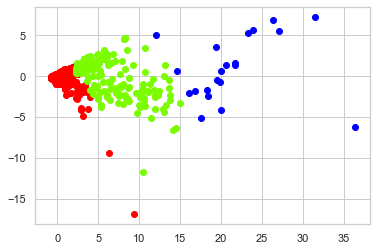

In [151]:
acp = PCA(n_components=2).fit_transform(X)
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[clusters_km==k,0],acp[clusters_km==k,1],c=couleur)
plt.show() 

## AFCM

In [152]:
#Tableau disjonctif
datFic=df[['Région de l\x92établissement','Filière de formation','Session']]
dc=pd.DataFrame(pd.get_dummies(datFic))
dc.head()

Région de létablissement_Auvergne-Rhône-Alpes  \
Établissement                                                                                     
Université Grenoble Alpes - Antennes de Valence                                               1   
Universite Jean Monnet, Saint-Etienne                                                         1   
Universite Jean Monnet, Saint-Etienne                                                         1   
Universite Jean Monnet, Saint-Etienne                                                         1   
Universite Jean Monnet, Saint-Etienne                                                         1   

                                                 Région de létablissement_Bourgogne-Franche-Comté  \
Établissement                                                                                        
Université Grenoble Alpes - Antennes de Valence                                                  0   
Universite Jean Monnet, Saint-Etienne                                                            0   
Universite Jean Monnet, Saint-Etienne                                                            0   
Universite Jean Monnet, Saint-Etienne                                                            0   
Universite Jean Monnet, Saint-Etienne                                                            0   

                                                 Région de létablissement_Bretagne  \
Établissement                                                                         
Université Grenoble Alpes - Antennes de Valence                                   0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   

                                                 Région de létablissement_Centre-Val de Loire  \
Établissement                                                                                    
Université Grenoble Alpes - Antennes de Valence                                              0   
Universite Jean Monnet, Saint-Etienne                                                        0   
Universite Jean Monnet, Saint-Etienne                                                        0   
Universite Jean Monnet, Saint-Etienne                                                        0   
Universite Jean Monnet, Saint-Etienne                                                        0   

                                                 Région de létablissement_Corse  \
Établissement                                                                      
Université Grenoble Alpes - Antennes de Valence                                0   
Universite Jean Monnet, Saint-Etienne                                          0   
Universite Jean Monnet, Saint-Etienne                                          0   
Universite Jean Monnet, Saint-Etienne                                          0   
Universite Jean Monnet, Saint-Etienne                                          0   

                                                 Région de létablissement_Etranger  \
Établissement                                                                         
Université Grenoble Alpes - Antennes de Valence                                   0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   
Universite Jean Monnet, Saint-Etienne                                             0   

                                                 Région de létablissement_Grand Est  \
Établissement                                           

In [153]:
from mca import MCA
mcaFic=MCA(dc,benzecri=False)
# Valeurs singulières
print(mcaFic.L)

[0.4136462  0.39885476 0.37380148 0.37374822 0.37164133 0.36642165
 0.36297373 0.36172905 0.36074629 0.3590729  0.35844369 0.35611665
 0.35159452 0.34970307 0.34897485 0.34737347 0.3469313  0.34395947
 0.34184355 0.34121991 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.32518068 0.32468847 0.32247413
 0.31968112 0.31920026 0.31770419 0.3169323  0.31516471 0.31037933
 0.30810445 0.30760063 0.30589059 0.30475721 0.30364786 0.30030819
 0.29467311 0.29292892 0.29270264 0.2658684  0.25665007]


In [154]:
#Colonnes
colonnes=mcaFic.fs_c()
print(colonnes)

[[ 0.19950177 -0.08255543 -0.04943569 ...  0.25201238 -0.06969798
   0.44915165]
 [ 0.32146724  0.46600178 -0.7014228  ...  1.43333366 -0.85037742
   1.03229007]
 [ 0.18223228  0.26275414 -0.15612092 ... -0.07097288  0.6919242
  -1.16956576]
 ...
 [-0.3307803   0.64358046 -0.17485572 ... -3.50338771  0.93965973
  -5.6107151 ]
 [ 0.63026085 -0.47192977 -0.06367504 ... -0.02967842  0.00641545
  -0.02882357]
 [-0.58235297  0.43605708  0.05883493 ...  0.02742248 -0.0059278
   0.02663261]]


In [ ]:
#lignes
lignes=mcaFic.fs_r()
print(lignes)

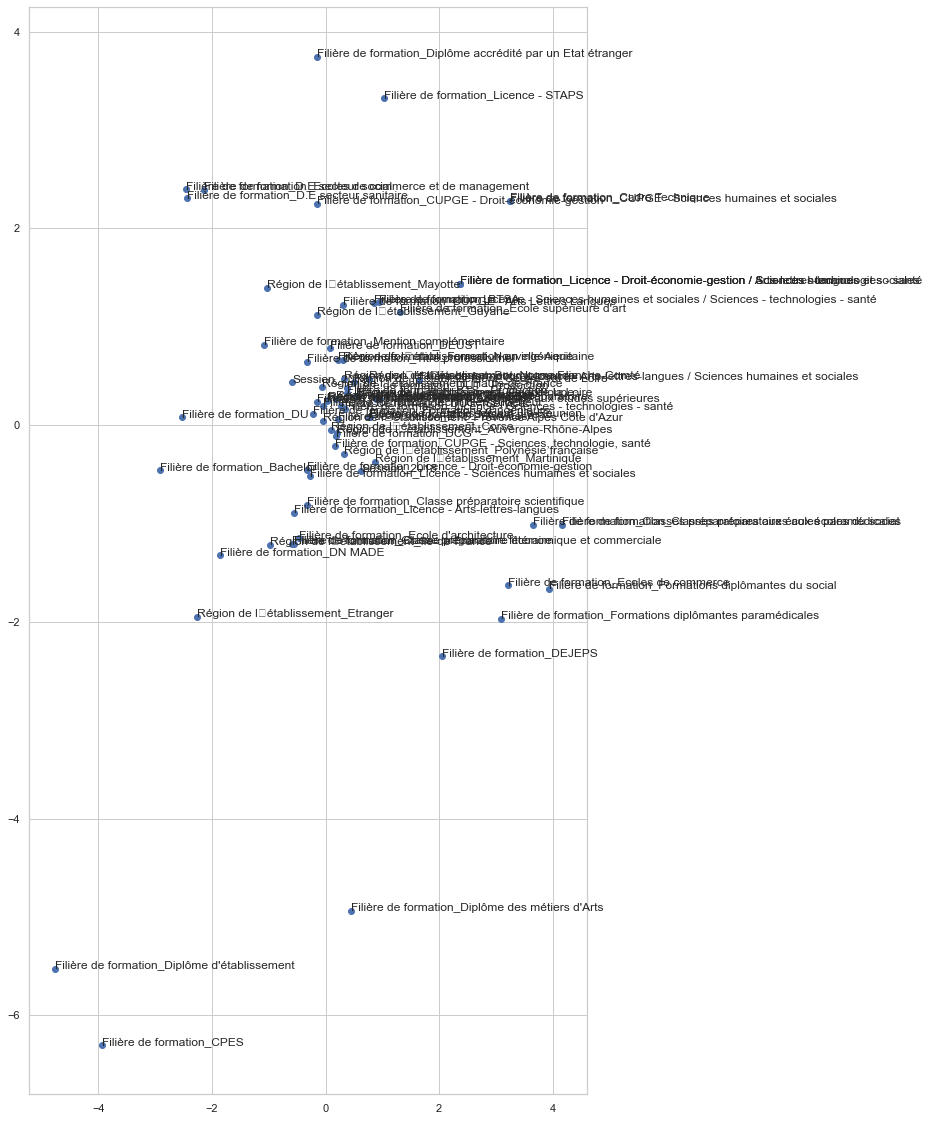

In [155]:
plt.figure(figsize=(10,20))
plt.scatter(colonnes[:, 0],colonnes[:, 1])
for i, j, nom in zip(colonnes[:, 0],colonnes[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.show()

In [ ]:
#plt.figure(figsize=(10,20))
#plt.scatter(lignes[:, 0],lignes[:, 1])
#for i, j, nom in zip(lignes[:, 0],lignes[:, 1], dc.index):
       #plt.text(i, j, nom)
#plt.show()